In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = "/content/drive/MyDrive/ADL/TP1/Q2/" 
os.makedirs(dir , exist_ok=True)

## Regression Problem: House Prices Prediction
In this exercise, we will solve a regression problem with a neural network.

**Objective:** The goal is to predict the house selling prices .

**Dataset:**  A csv file with 1460 samples is provided (on the course webpage). Each example contains four input features. We will use 1000 examples as training set, 200 as validation set and the rest as test set.   
   * **Feature names**: OverallQual, YearBuilt, TotalBsmtSF, GrLivArea
   * **Target**: SalePrice

**NB:** new required libraries: `pandas`, `seaborn`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns

%matplotlib inline

In [ ]:
# Load data:
df = pd.read_csv(dir + "house_prices.csv")

In [ ]:
normalized_df=(df-df.mean())/df.std()

In [ ]:
mean = df.mean()
std = df.std()

In [ ]:
df.head(3)

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
0,7,2003,856,1710,208500
1,6,1976,1262,1262,181500
2,7,2001,920,1786,223500


In [ ]:
df.info() # get more information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   YearBuilt    1460 non-null   int64
 2   TotalBsmtSF  1460 non-null   int64
 3   GrLivArea    1460 non-null   int64
 4   SalePrice    1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


### Data Analysis
Before training, we need first to analyze the dataset, to know its properties better.

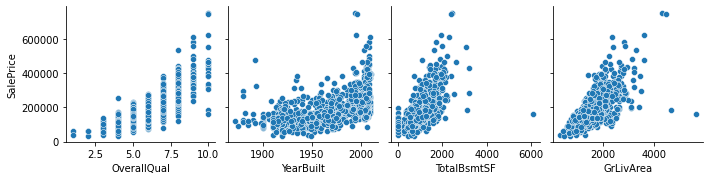

In [ ]:
sns.pairplot(df, x_vars=['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea'], 
             y_vars=['SalePrice'])

### House prices prediction

Here is a skeleton of a neural network with a single layer (thus: a linear classifier). This is the model you'll start with and improve during this exercise.

Look at the code and run it to see its structure, then follow the questions below to iteratively improve the model.

In [ ]:
X = normalized_df[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']] # get the four features from the dataframe
y = normalized_df['SalePrice'] # get the target values

In [ ]:
X_train = X.iloc[:1000]
y_train = y.iloc[:1000]

X_val = X.iloc[1000:1200]
y_val = y.iloc[1000:1200]

X_test = X.iloc[1200:]
y_test = y.iloc[1200:]

In [ ]:
# Construct a model with one layer
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        
        self.l1 = nn.Linear(4, 1)
        
    def forward(self, inputs):
        outputs = self.l1(inputs)
        return outputs

In [ ]:
train_set = TensorDataset(torch.from_numpy(np.array(X_train)).float(), 
                          torch.from_numpy(np.array(y_train)).float())

val_set = TensorDataset(torch.from_numpy(np.array(X_val)).float(), 
                          torch.from_numpy(np.array(y_val)).float())

test_set = TensorDataset(torch.from_numpy(np.array(X_test)).float(), 
                          torch.from_numpy(np.array(y_test)).float())



In [ ]:
def train(num_epochs, batch_size, criterion, optimizer, model, dataset, val_set):
    train_error = []
    val_error = []
    train_loader = DataLoader(dataset, batch_size, shuffle=True)
    for epoch in range(num_epochs):
        epoch_average_loss = 0.0
        model.train() # Indicates to the network we are in training mode
        for (X, y) in (train_loader):

            y_pre = model(X).view(-1)
            loss = criterion(y_pre, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_average_loss += loss.item() * batch_size / len(train_set)

        train_error.append(epoch_average_loss)

        epoch_average_loss_val = 0.0
        model.eval() # Adding Validation Errors
        val_loader = DataLoader(val_set, batch_size, shuffle=True)
        for (X, y) in val_loader:
          y_pre = model(X).view(-1)      
          loss = criterion(y_pre, y) #Real number
          epoch_average_loss_val += loss.item() * batch_size / len(val_set)
        val_error.append(epoch_average_loss_val)
        print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f},'.format(epoch+1, num_epochs, epoch_average_loss,epoch_average_loss_val ))
  
    return train_error, val_error

In [ ]:
# Define hyper-parameters:
model = Model()

# Choose the hyperparameters for training: 
num_epochs = 50
batch_size = 10
LR = 10**-4

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [ ]:
train_error, val_error = train(num_epochs, batch_size, criterion, optimizer, model, train_set, val_set)

Epoch [1/50], Train Loss: 2.1739, Val Loss: 2.4198,
Epoch [2/50], Train Loss: 2.0294, Val Loss: 2.2682,
Epoch [3/50], Train Loss: 1.8967, Val Loss: 2.1286,
Epoch [4/50], Train Loss: 1.7749, Val Loss: 2.0001,
Epoch [5/50], Train Loss: 1.6630, Val Loss: 1.8818,
Epoch [6/50], Train Loss: 1.5602, Val Loss: 1.7726,
Epoch [7/50], Train Loss: 1.4655, Val Loss: 1.6719,
Epoch [8/50], Train Loss: 1.3785, Val Loss: 1.5791,
Epoch [9/50], Train Loss: 1.2985, Val Loss: 1.4933,
Epoch [10/50], Train Loss: 1.2247, Val Loss: 1.4141,
Epoch [11/50], Train Loss: 1.1568, Val Loss: 1.3410,
Epoch [12/50], Train Loss: 1.0942, Val Loss: 1.2733,
Epoch [13/50], Train Loss: 1.0364, Val Loss: 1.2107,
Epoch [14/50], Train Loss: 0.9832, Val Loss: 1.1527,
Epoch [15/50], Train Loss: 0.9339, Val Loss: 1.0989,
Epoch [16/50], Train Loss: 0.8884, Val Loss: 1.0490,
Epoch [17/50], Train Loss: 0.8463, Val Loss: 1.0028,
Epoch [18/50], Train Loss: 0.8074, Val Loss: 0.9599,
Epoch [19/50], Train Loss: 0.7714, Val Loss: 0.9200,
Ep

#### Evaluate the Model on the validation set

In [ ]:
# Calculate mean squared error on validation set
model.eval()
with torch.no_grad():
    y_pre_val = model(torch.from_numpy(np.array(X_val)).float()).view(-1)
error = criterion(y_pre_val, torch.tensor(np.array(y_val)).float()).item()
print('The loss on validation set is:', error)

The loss on validation set is: 0.41302430629730225


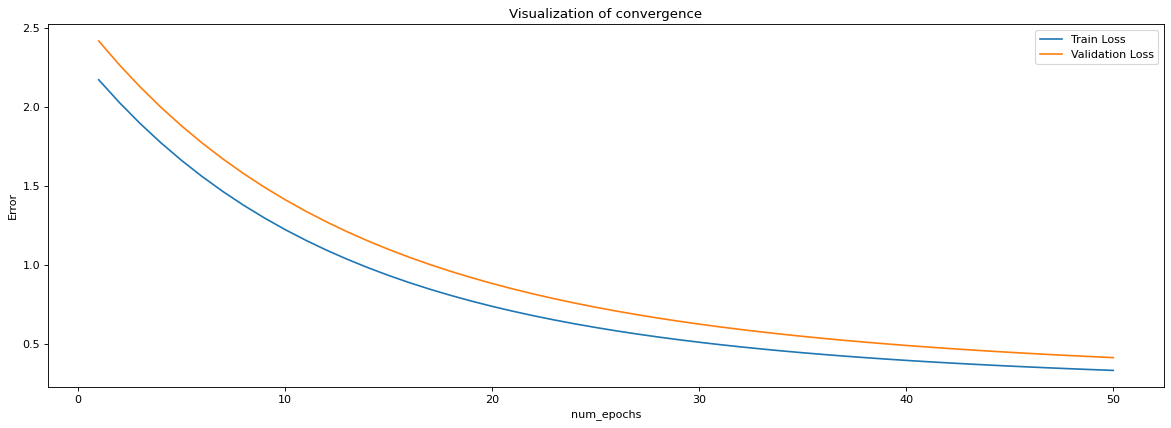

In [ ]:
# plot the training error wrt. the number of epochs: 
from matplotlib.pyplot import figure
figure(figsize=(18, 6), dpi=80)
plt.plot(range(1, num_epochs+1), train_error, label = 'Train Loss')
plt.plot(range(1, num_epochs+1), val_error, label = 'Validation Loss')
plt.xlabel("num_epochs")
plt.ylabel("Error")
plt.title(f"Visualization of convergence")
plt.legend()
plt.savefig(dir + f'Visualization of convergence.png')
plt.show()

### Exercise 1: Impact of the architecture of the model

The class `Model` is the definition of your model. You can now modify it to try out different architectures and
see the impact of the following factors:

* Try to add more layers (1, 2, 3, more ?)
* Try different activation functions ([sigmoid](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.sigmoid), [tanh](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.tanh), [relu](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.relu), etc.)
* Try to change the number of neurons in each layer (5, 10, 20, more ?)

In [ ]:
class Model(nn.Module):
    
    def __init__(self, arch, end_node=1):
        super(Model, self).__init__()
        
        self.arch = arch

        self.l1_1 = nn.Linear(4, 100)
        self.l2_1 = nn.Linear(100, 100)
        self.l3_1 = nn.Linear(100, 100)
        self.l4_1 = nn.Linear(100, 100)
        self.l5_1 = nn.Linear(100, end_node)

        self.l1_2 = nn.Linear(4, 100)
        self.l2_2 = nn.Linear(100, 200)
        self.l3_2 = nn.Linear(200, 200)
        self.l4_2 = nn.Linear(200, 100)
        self.l5_2 = nn.Linear(100, end_node)

        self.drop = nn.Dropout(p=0.5)
        self.node = end_node

        

    def forward(self, inputs):

        if self.arch == 1: #Adding more layers
          outputs = self.l1_1(inputs)
          outputs = self.l2_1(outputs)
          outputs = self.l3_1(outputs)
          outputs = self.l4_1(outputs)
          outputs = self.l5_1(outputs)

        if self.arch == 2: #Adding Activation Function
          outputs = F.relu(self.l1_1(inputs))
          outputs = F.relu(self.l2_1(outputs))
          outputs = F.relu(self.l3_1(outputs))
          outputs = F.relu(self.l4_1(outputs))
          outputs = self.l5_1(outputs)

        if self.arch == 3: #Changin Number of Neurons on 1
          outputs = self.l1_2(inputs)
          outputs = self.l2_2(outputs)
          outputs = self.l3_2(outputs)
          outputs = self.l4_2(outputs)
          outputs = self.l5_2(outputs)

        if self.arch == 4: #Changing numebr of neurons and adding activations
          outputs = F.relu(self.l1_2(inputs))
          outputs = F.relu(self.l2_2(outputs))
          outputs = F.relu(self.l3_2(outputs))
          outputs = F.relu(self.l4_2(outputs))
          outputs = self.l5_2(outputs)

        return outputs

Architecture 1:

In [ ]:
#Define ARCH
ARCH = 1

# Define hyper-parameters:
model = Model(arch=ARCH)

# Choose the hyperparameters for training: 
num_epochs = 10
batch_size = 10
LR = 10**-3

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [ ]:
train_error, val_error = train(num_epochs, batch_size, criterion, optimizer, model, train_set, val_set)

Epoch [1/10], Train Loss: 0.6256, Val Loss: 0.4272,
Epoch [2/10], Train Loss: 0.2711, Val Loss: 0.2702,
Epoch [3/10], Train Loss: 0.2225, Val Loss: 0.2548,
Epoch [4/10], Train Loss: 0.2178, Val Loss: 0.2494,
Epoch [5/10], Train Loss: 0.2174, Val Loss: 0.2478,
Epoch [6/10], Train Loss: 0.2171, Val Loss: 0.2468,
Epoch [7/10], Train Loss: 0.2172, Val Loss: 0.2464,
Epoch [8/10], Train Loss: 0.2170, Val Loss: 0.2453,
Epoch [9/10], Train Loss: 0.2177, Val Loss: 0.2463,
Epoch [10/10], Train Loss: 0.2165, Val Loss: 0.2448,


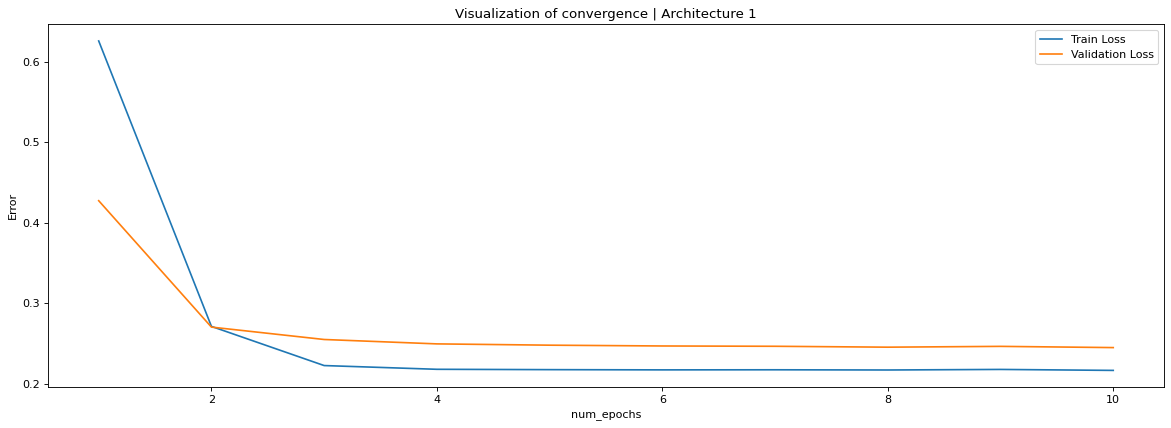

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(18, 6), dpi=80)
plt.plot(range(1, num_epochs+1), train_error, label = 'Train Loss')
plt.plot(range(1, num_epochs+1), val_error, label = 'Validation Loss')
plt.xlabel("num_epochs")
plt.ylabel("Error")
plt.title(f"Visualization of convergence | Architecture {ARCH}")
plt.legend()
plt.savefig(dir + f'Visualization of convergence | Architecture {ARCH}.png')
plt.show()

Architecture 2:

In [ ]:
#Define ARCH
ARCH = 2

# Define hyper-parameters:
model = Model(arch=ARCH)

# Choose the hyperparameters for training: 
num_epochs = 10
batch_size = 10
LR = 10**-2
# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [ ]:
train_error, val_error = train(num_epochs, batch_size, criterion, optimizer, model, train_set, val_set)

Epoch [1/10], Train Loss: 0.9560, Val Loss: 0.9201,
Epoch [2/10], Train Loss: 0.4427, Val Loss: 0.2912,
Epoch [3/10], Train Loss: 0.2065, Val Loss: 0.2082,
Epoch [4/10], Train Loss: 0.2051, Val Loss: 0.1998,
Epoch [5/10], Train Loss: 0.1946, Val Loss: 0.1904,
Epoch [6/10], Train Loss: 0.1863, Val Loss: 0.2235,
Epoch [7/10], Train Loss: 0.1936, Val Loss: 0.1874,
Epoch [8/10], Train Loss: 0.1843, Val Loss: 0.2045,
Epoch [9/10], Train Loss: 0.1837, Val Loss: 0.2070,
Epoch [10/10], Train Loss: 0.1804, Val Loss: 0.2610,


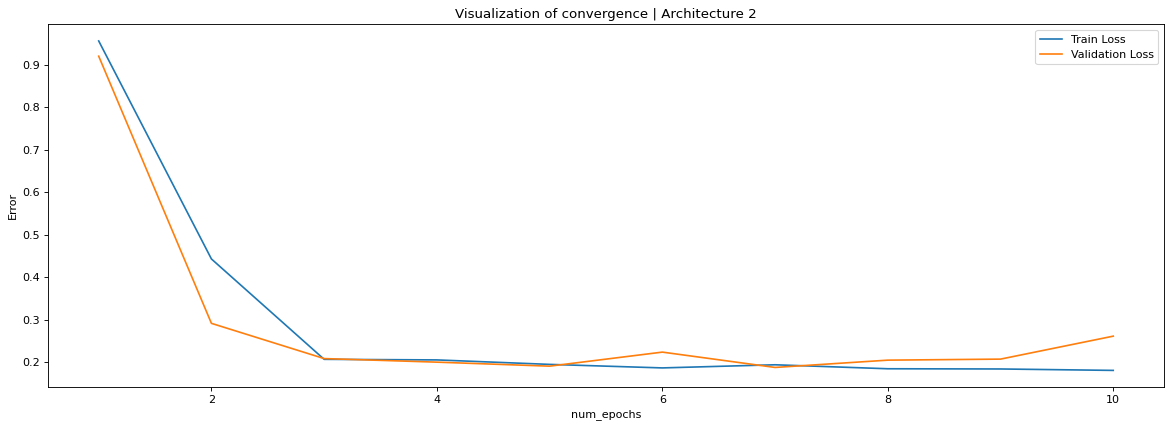

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(18, 6), dpi=80)
plt.plot(range(1, num_epochs+1), train_error, label = 'Train Loss')
plt.plot(range(1, num_epochs+1), val_error, label = 'Validation Loss')
plt.xlabel("num_epochs")
plt.ylabel("Error")
plt.title(f"Visualization of convergence | Architecture {ARCH}")
plt.legend()
plt.savefig(dir + f'Visualization of convergence | Architecture {ARCH}.png')
plt.show()

Architecture 3:

In [ ]:
#Define ARCH
ARCH = 3

# Define hyper-parameters:
model = Model(arch=ARCH)

# Choose the hyperparameters for training: 
num_epochs = 10
batch_size = 10
LR = 10**-4

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [ ]:
train_error, val_error = train(num_epochs, batch_size, criterion, optimizer, model, train_set, val_set)

Epoch [1/10], Train Loss: 1.0224, Val Loss: 1.0522,
Epoch [2/10], Train Loss: 0.8981, Val Loss: 0.9336,
Epoch [3/10], Train Loss: 0.7909, Val Loss: 0.8299,
Epoch [4/10], Train Loss: 0.6971, Val Loss: 0.7383,
Epoch [5/10], Train Loss: 0.6146, Val Loss: 0.6574,
Epoch [6/10], Train Loss: 0.5422, Val Loss: 0.5858,
Epoch [7/10], Train Loss: 0.4791, Val Loss: 0.5235,
Epoch [8/10], Train Loss: 0.4250, Val Loss: 0.4700,
Epoch [9/10], Train Loss: 0.3794, Val Loss: 0.4251,
Epoch [10/10], Train Loss: 0.3420, Val Loss: 0.3881,


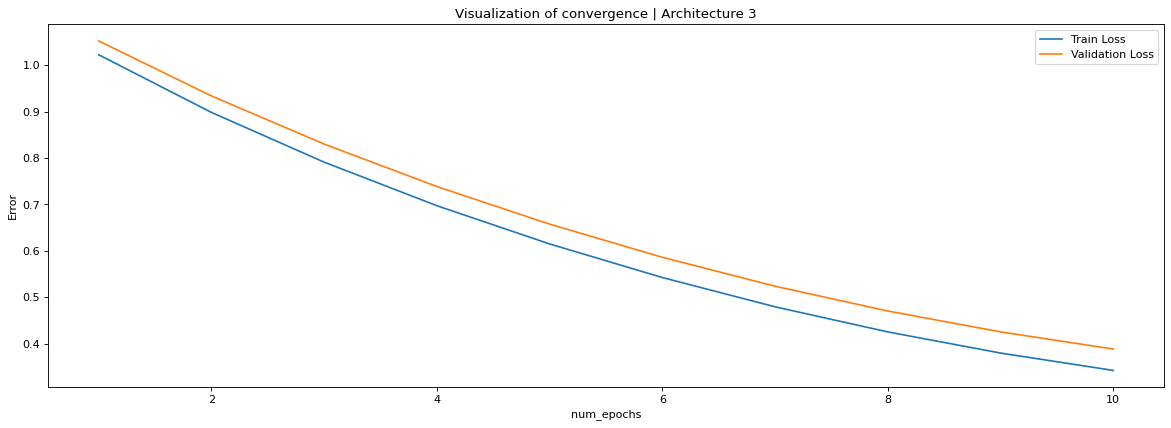

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(18, 6), dpi=80)
plt.plot(range(1, num_epochs+1), train_error, label = 'Train Loss')
plt.plot(range(1, num_epochs+1), val_error, label = 'Validation Loss')
plt.xlabel("num_epochs")
plt.ylabel("Error")
plt.title(f"Visualization of convergence | Architecture {ARCH}")
plt.legend()
plt.savefig(dir + f'Visualization of convergence | Architecture {ARCH}.png')
plt.show()

Architecture 4:

In [ ]:
#Define ARCH
ARCH = 4

# Define hyper-parameters:
model = Model(arch=ARCH)

# Choose the hyperparameters for training: 
num_epochs = 10
batch_size = 10
LR = 10**-2

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = nn.MSELoss()

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [ ]:
train_error, val_error = train(num_epochs, batch_size, criterion, optimizer, model, train_set, val_set)

Epoch [1/10], Train Loss: 0.7824, Val Loss: 0.4011,
Epoch [2/10], Train Loss: 0.2124, Val Loss: 0.2023,
Epoch [3/10], Train Loss: 0.2015, Val Loss: 0.3034,
Epoch [4/10], Train Loss: 0.1815, Val Loss: 0.1790,
Epoch [5/10], Train Loss: 0.1882, Val Loss: 0.3793,
Epoch [6/10], Train Loss: 0.2051, Val Loss: 0.1793,
Epoch [7/10], Train Loss: 0.1974, Val Loss: 0.1766,
Epoch [8/10], Train Loss: 0.1773, Val Loss: 0.4464,
Epoch [9/10], Train Loss: 0.1929, Val Loss: 0.1709,
Epoch [10/10], Train Loss: 0.1847, Val Loss: 0.1716,


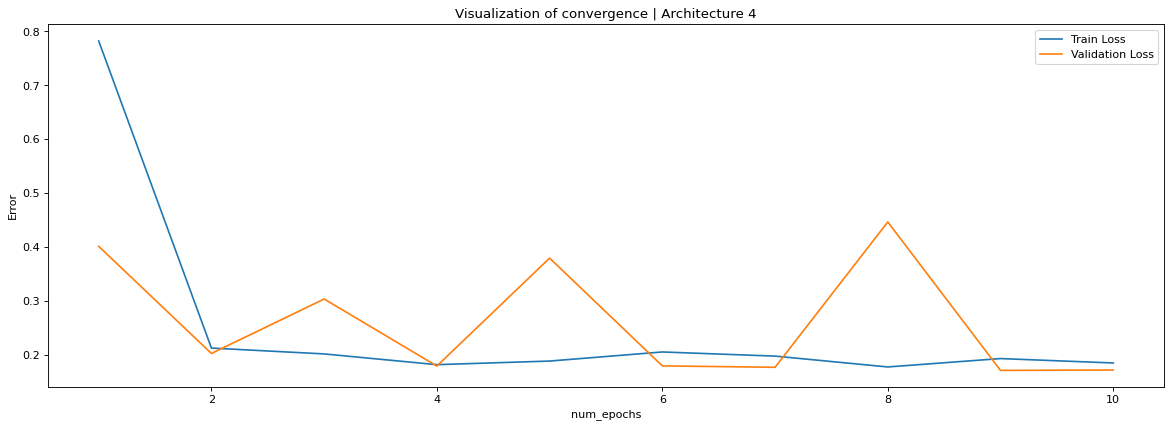

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(18, 6), dpi=80)
plt.plot(range(1, num_epochs+1), train_error, label = 'Train Loss')
plt.plot(range(1, num_epochs+1), val_error, label = 'Validation Loss')
plt.xlabel("num_epochs")
plt.ylabel("Error")
plt.title(f"Visualization of convergence | Architecture {ARCH}")
plt.legend()
plt.savefig(dir + f'Visualization of convergence | Architecture {ARCH}.png')
plt.show()

### Exercise 2: Impact of the optimizer

Retrain the model with different parameters of the optimizer; you can change then in the cell initializing the optimizer, after the definition of your model.

* Use different batch sizes, from 10 to 400 e.g.
* Try different values of the learning rate (between 0.001 and 10), and see how they impact the training process. Do all network architectures react the same way to different learning rates?
* Change the duration of the training by increasing the number of epochs
* Try other optimizers, such as [Adam](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam) or [RMSprop](https://pytorch.org/docs/stable/optim.html?highlight=rmsprop#torch.optim.RMSprop)

**Note:** These changes may interact with your previous choices of architectures, and you may need to change them as well!

In [ ]:
LRs = [10**-1,10**-2,10**-3, 10**-4,10**-5,10**-6, 10**-7]
Optimizers = [1,2,3] #1 SGD #2 Adam #3 RMSProp

In [ ]:
# Choose the hyperparameters for training: 
num_epochs = 10
batch_size = 10

Architecture 1:

In [ ]:
#Define ARCH
ARCH = 1

Now Running - ARCH: 1; LR: 0.1; Optimizer: 1
Epoch [1/10], Train Loss: 0.4504, Val Loss: 0.6582,
Epoch [2/10], Train Loss: nan, Val Loss: nan,
Epoch [3/10], Train Loss: nan, Val Loss: nan,
Epoch [4/10], Train Loss: nan, Val Loss: nan,
Epoch [5/10], Train Loss: nan, Val Loss: nan,
Epoch [6/10], Train Loss: nan, Val Loss: nan,
Epoch [7/10], Train Loss: nan, Val Loss: nan,
Epoch [8/10], Train Loss: nan, Val Loss: nan,
Epoch [9/10], Train Loss: nan, Val Loss: nan,
Epoch [10/10], Train Loss: nan, Val Loss: nan,
Now Running - ARCH: 1; LR: 0.01; Optimizer: 1
Epoch [1/10], Train Loss: 0.2894, Val Loss: 0.2623,
Epoch [2/10], Train Loss: 0.2460, Val Loss: 0.2424,
Epoch [3/10], Train Loss: 0.2260, Val Loss: 0.2556,
Epoch [4/10], Train Loss: 0.2343, Val Loss: 0.2485,
Epoch [5/10], Train Loss: 0.2291, Val Loss: 0.2452,
Epoch [6/10], Train Loss: 0.2321, Val Loss: 0.2455,
Epoch [7/10], Train Loss: 0.2336, Val Loss: 0.2524,
Epoch [8/10], Train Loss: 0.2329, Val Loss: 0.2508,
Epoch [9/10], Train Loss: 

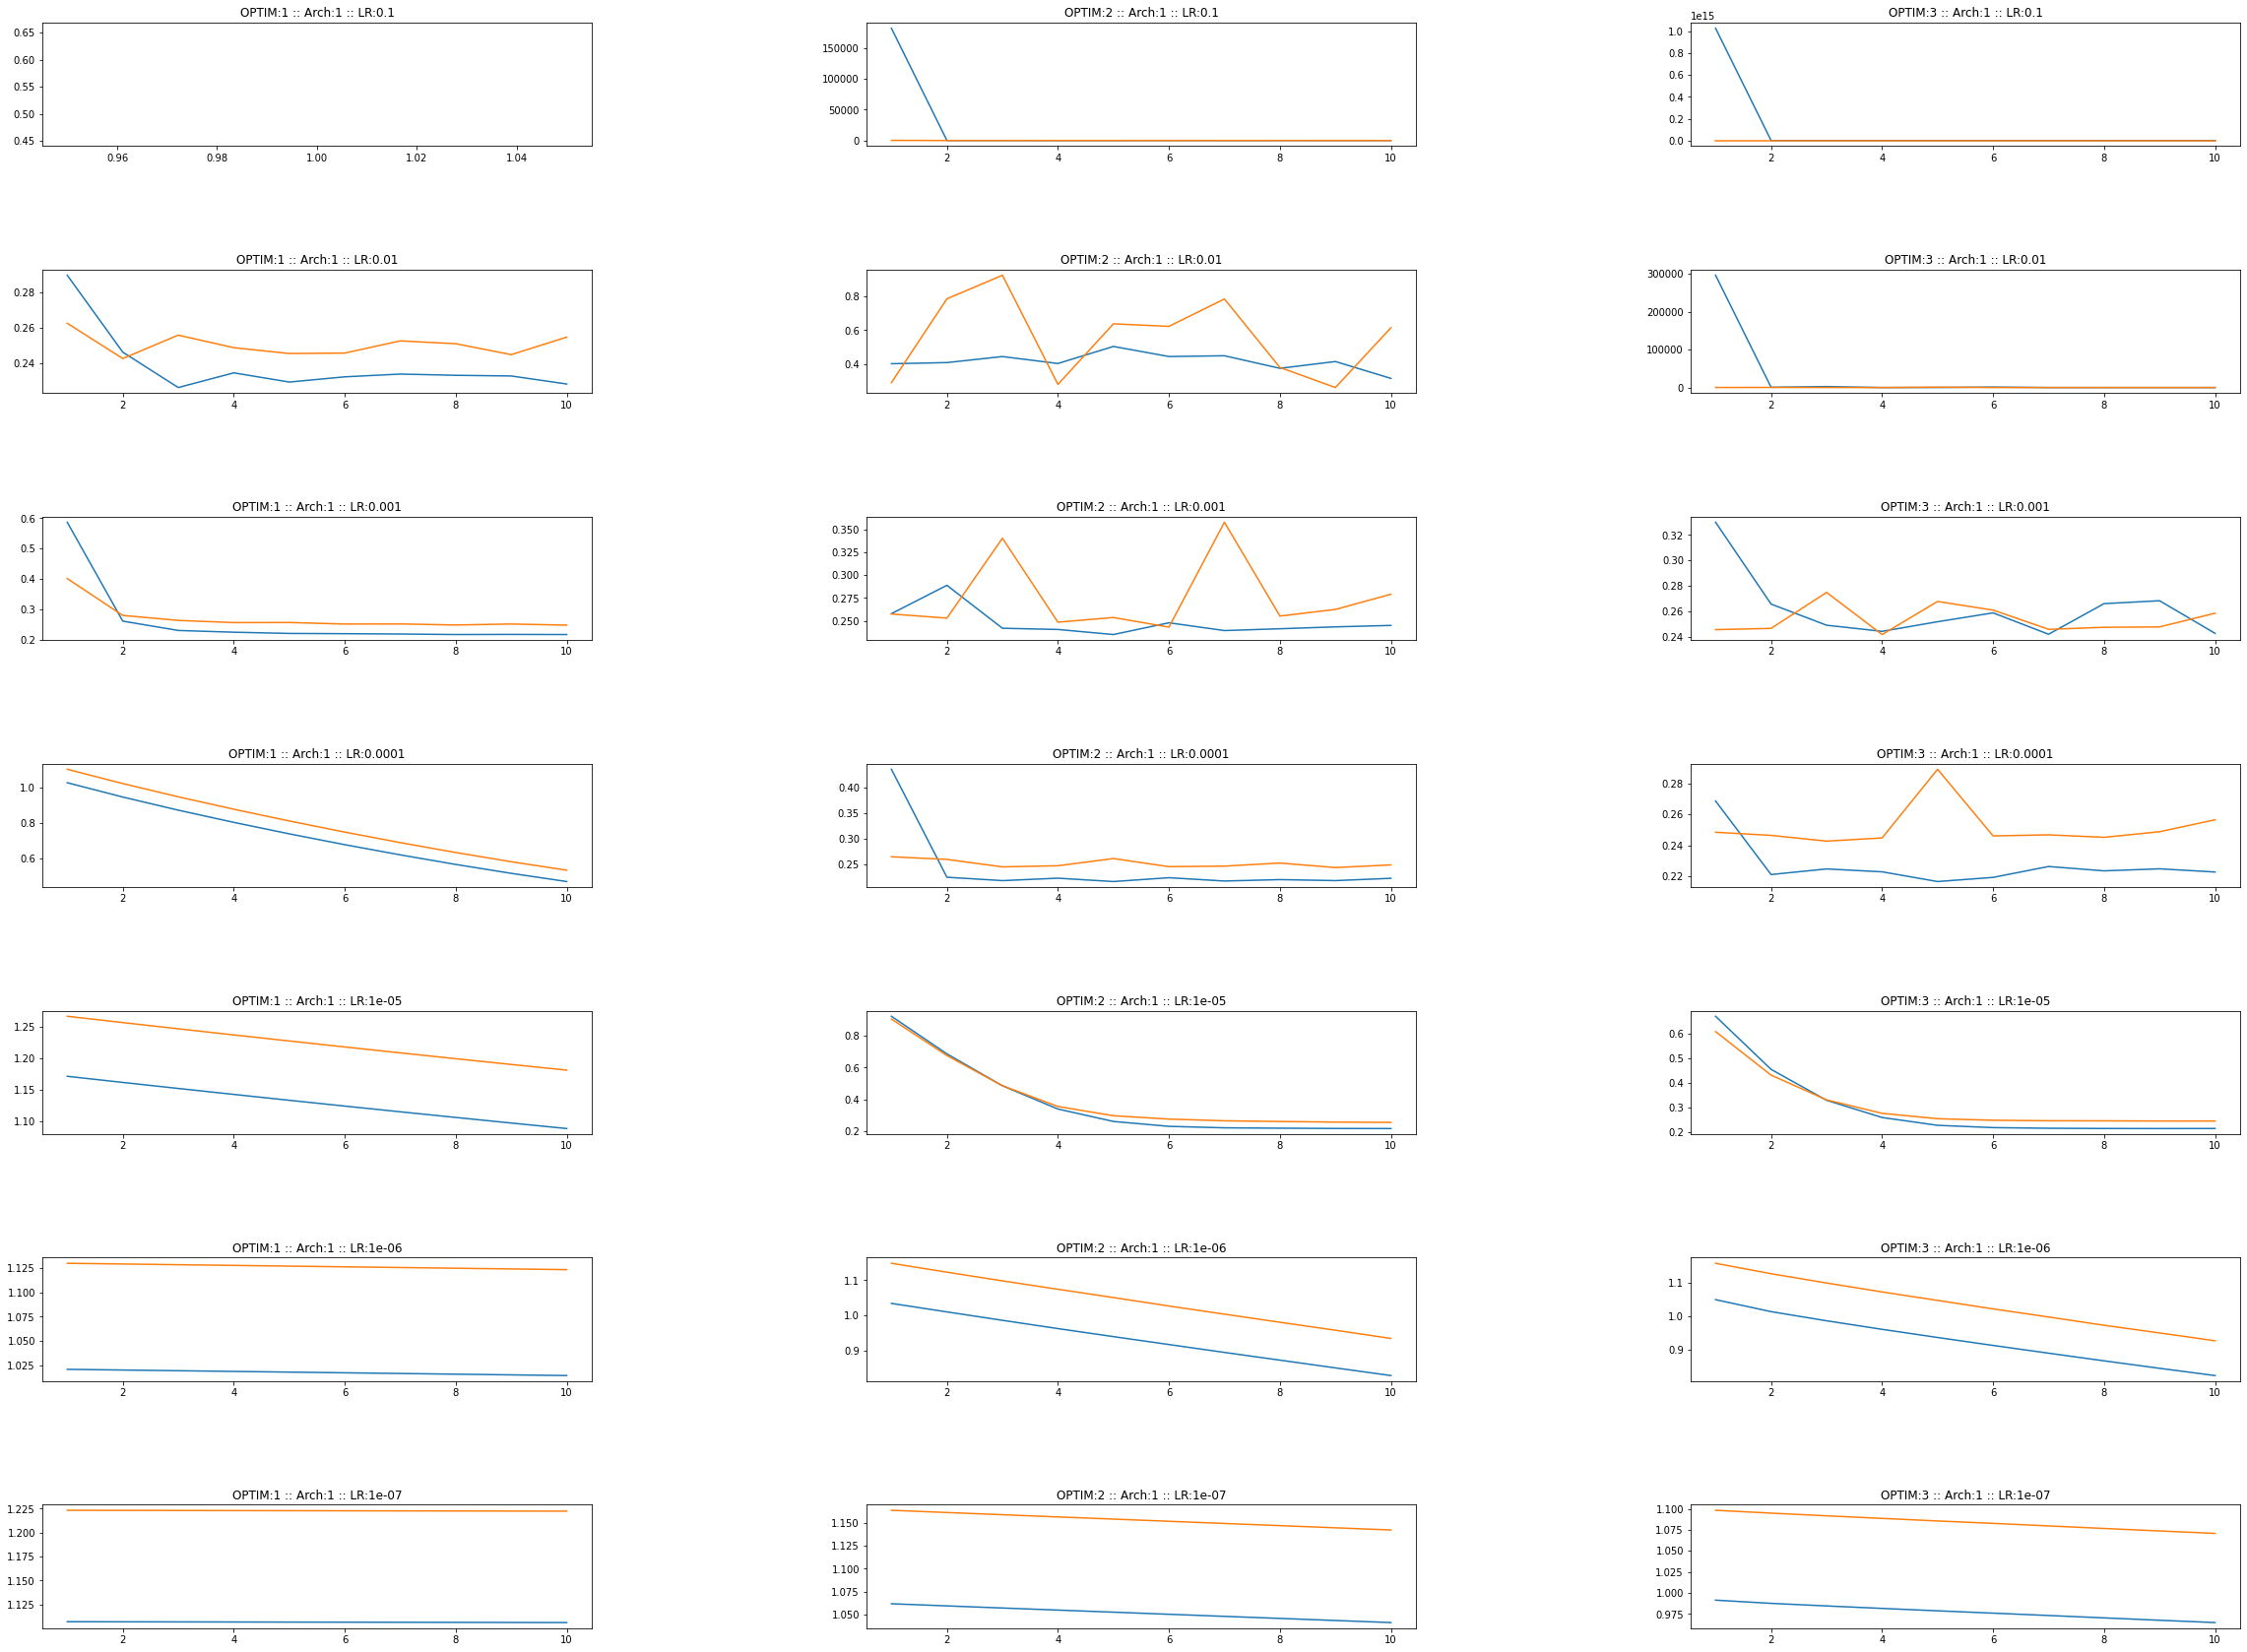

In [ ]:
fig, axs = plt.subplots(len(LRs),len(Optimizers), figsize=(40, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.5)
i, j = 0, 0

for O in Optimizers:
  j = 0
  for LR in LRs:

    model = Model(arch=ARCH)
    criterion = nn.MSELoss()

    if O == 1:
      optimizer = torch.optim.SGD(model.parameters(), lr=LR)
    if O == 2:
      optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    if O == 3:
      optimizer = torch.optim.RMSprop(model.parameters(), lr=LR)
    print(f"Now Running - ARCH: {ARCH}; LR: {LR}; Optimizer: {O}")
    train_error, val_error = train(num_epochs, batch_size, criterion, optimizer, model, train_set, val_set)

    axs[j,i].plot(range(1, num_epochs+1), train_error, label = 'Train Loss')
    axs[j,i].plot(range(1, num_epochs+1), val_error, label = 'Val Loss')
    axs[j,i].set_title(f'OPTIM:{O} :: Arch:{ARCH} :: LR:{LR}')

    j += 1
  i += 1


fig.savefig(dir + f'Visualization of Optim Change -- ARCH: {ARCH} Q2.png')

Architecture 2:

In [ ]:
#Define ARCH
ARCH = 2

Now Running - ARCH: 2; LR: 0.1; Optimizer: 1
Epoch [1/10], Train Loss: 0.9784, Val Loss: 0.4286,
Epoch [2/10], Train Loss: 0.3371, Val Loss: 0.5978,
Epoch [3/10], Train Loss: 0.3299, Val Loss: 0.3166,
Epoch [4/10], Train Loss: 0.2882, Val Loss: 0.4041,
Epoch [5/10], Train Loss: 0.2561, Val Loss: 0.2988,
Epoch [6/10], Train Loss: 0.2944, Val Loss: 0.3892,
Epoch [7/10], Train Loss: 0.2638, Val Loss: 0.3085,
Epoch [8/10], Train Loss: 0.2791, Val Loss: 0.3322,
Epoch [9/10], Train Loss: 0.2488, Val Loss: 0.3714,
Epoch [10/10], Train Loss: 0.2295, Val Loss: 0.2514,
Now Running - ARCH: 2; LR: 0.01; Optimizer: 1
Epoch [1/10], Train Loss: 0.9453, Val Loss: 0.9135,
Epoch [2/10], Train Loss: 0.4576, Val Loss: 0.2677,
Epoch [3/10], Train Loss: 0.2037, Val Loss: 0.2229,
Epoch [4/10], Train Loss: 0.1981, Val Loss: 0.2112,
Epoch [5/10], Train Loss: 0.1880, Val Loss: 0.2424,
Epoch [6/10], Train Loss: 0.1816, Val Loss: 0.2815,
Epoch [7/10], Train Loss: 0.1989, Val Loss: 0.2132,
Epoch [8/10], Train Loss

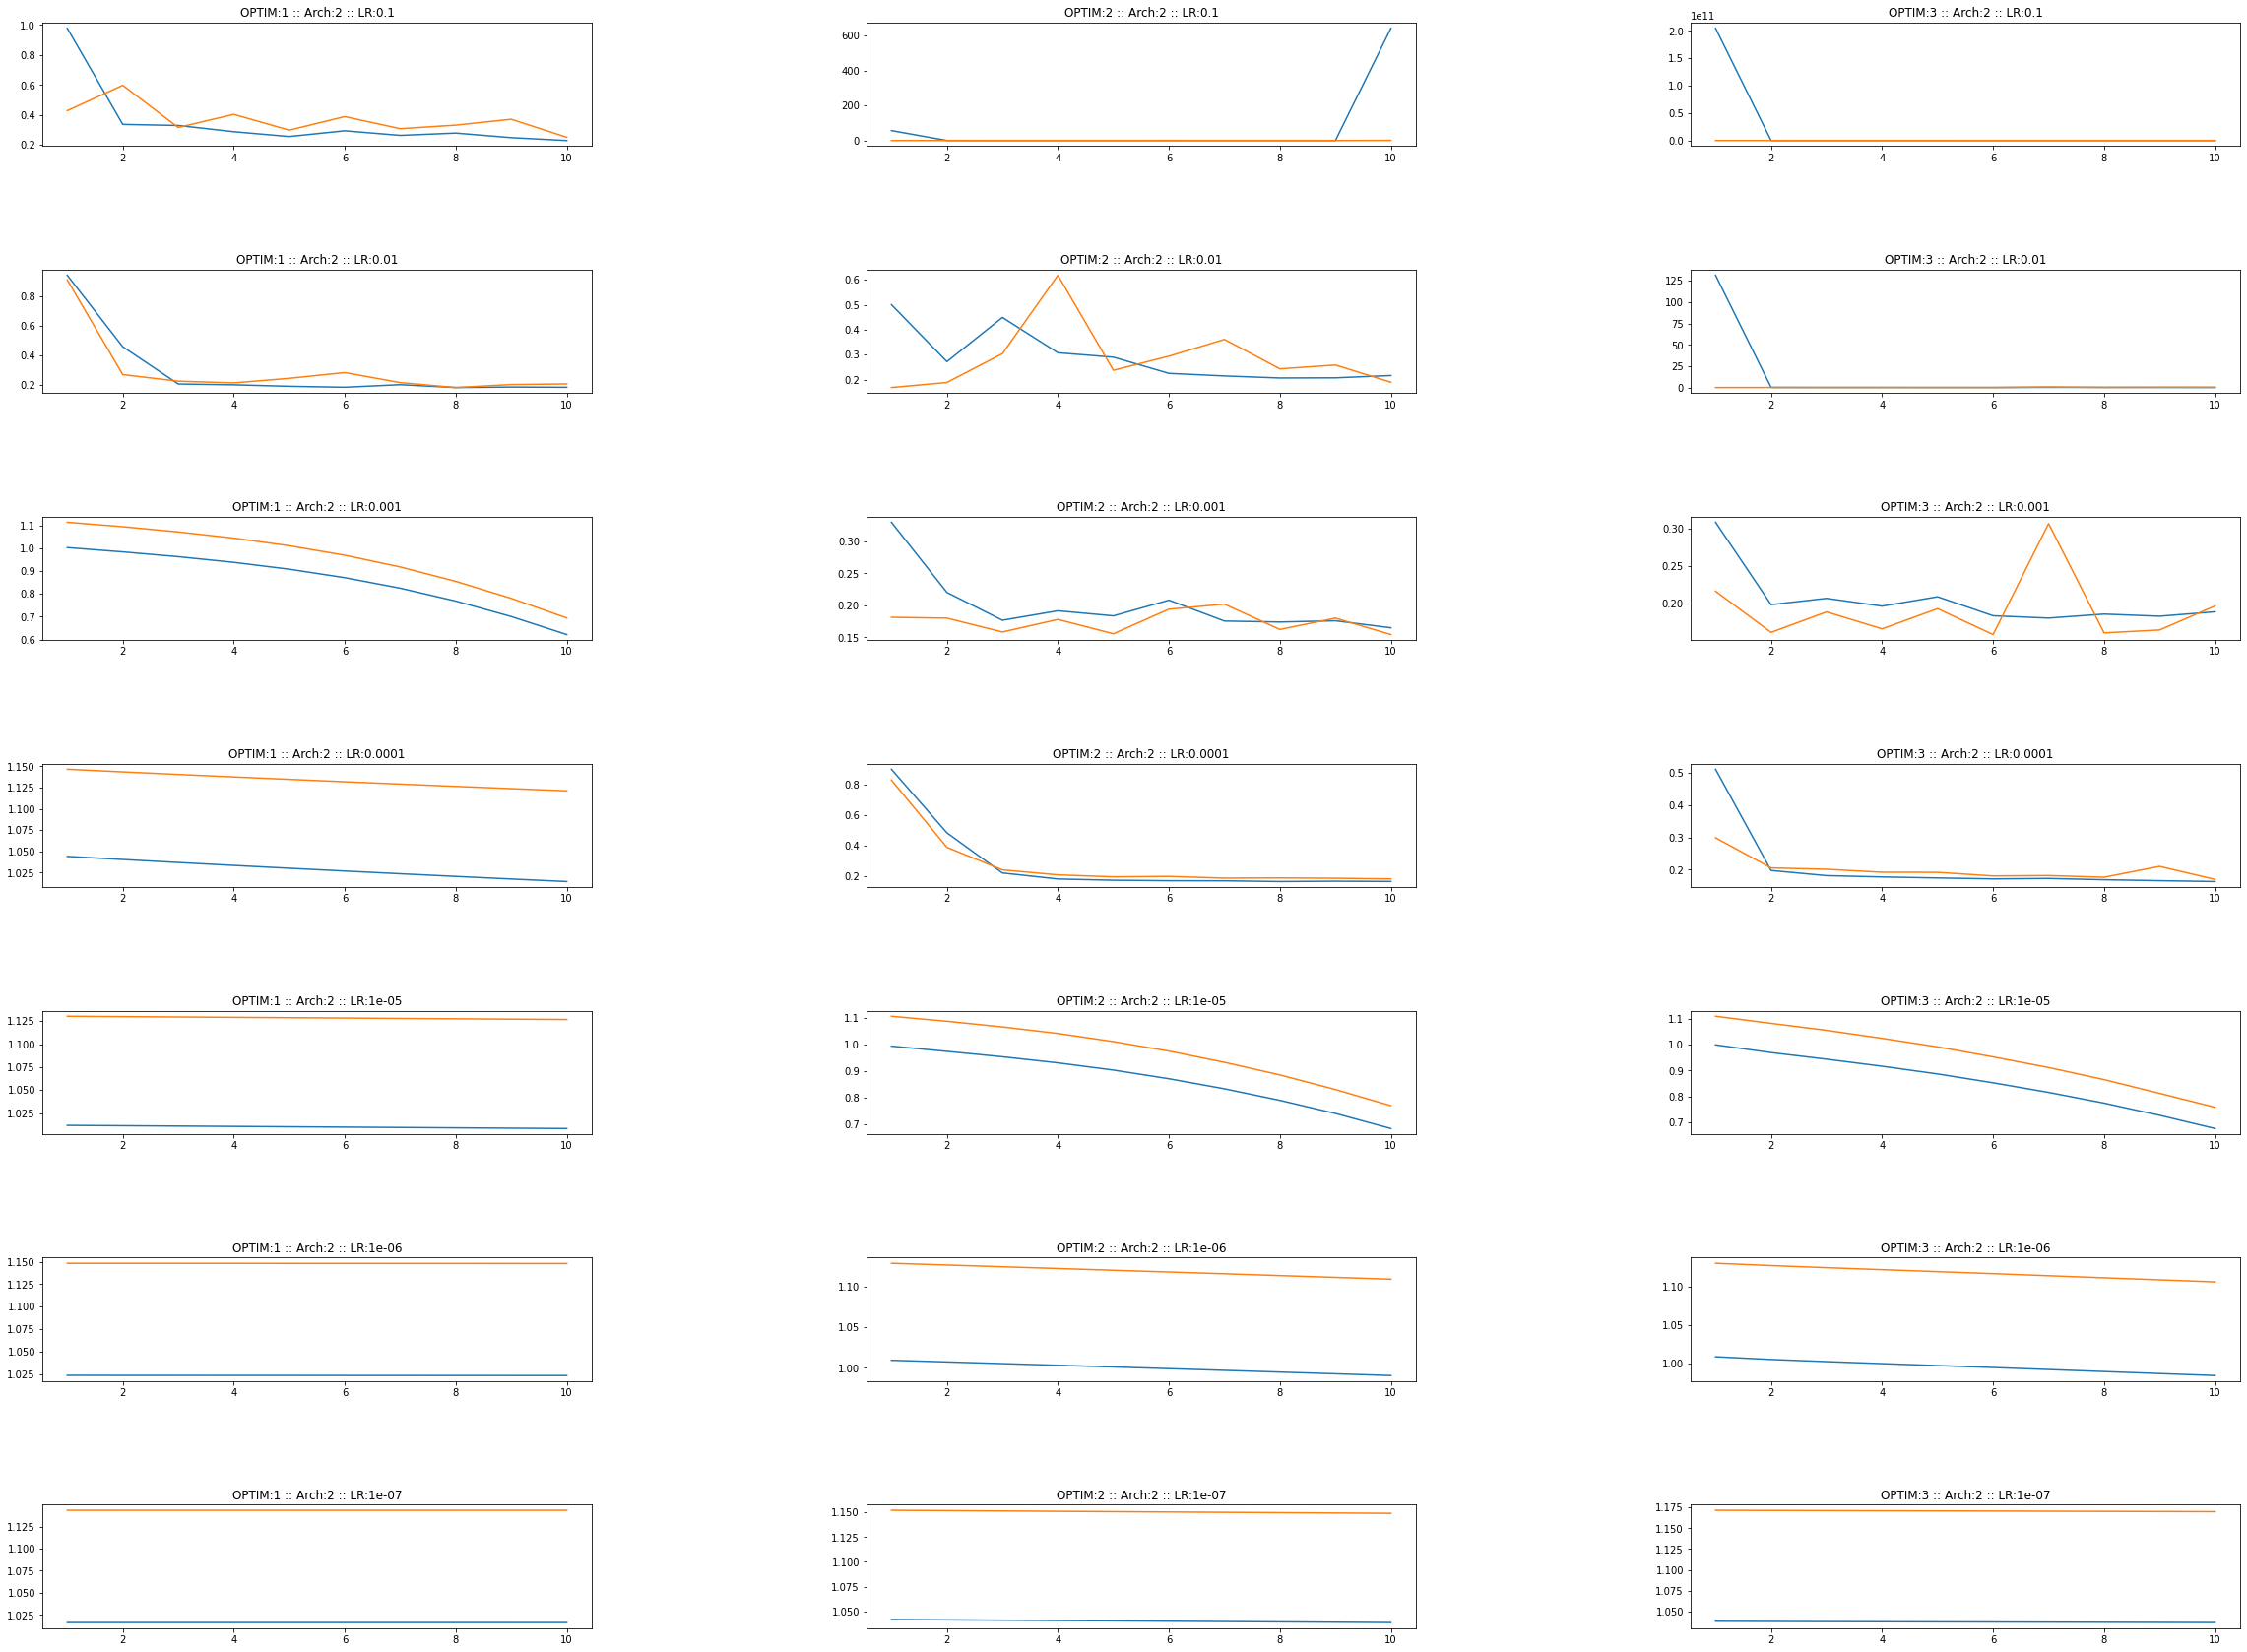

In [ ]:
fig, axs = plt.subplots(len(LRs),len(Optimizers), figsize=(40, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.5)
i, j = 0, 0

for O in Optimizers:
  j = 0
  for LR in LRs:

    model = Model(arch=ARCH)
    criterion = nn.MSELoss()
    
    if O == 1:
      optimizer = torch.optim.SGD(model.parameters(), lr=LR)
    if O == 2:
      optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    if O == 3:
      optimizer = torch.optim.RMSprop(model.parameters(), lr=LR)
    print(f"Now Running - ARCH: {ARCH}; LR: {LR}; Optimizer: {O}")
    train_error, val_error = train(num_epochs, batch_size, criterion, optimizer, model, train_set, val_set)

    axs[j,i].plot(range(1, num_epochs+1), train_error, label = 'Train Loss')
    axs[j,i].plot(range(1, num_epochs+1), val_error, label = 'Val Loss')
    axs[j,i].set_title(f'OPTIM:{O} :: Arch:{ARCH} :: LR:{LR}')

    j += 1
  i += 1


fig.savefig(dir + f'Visualization of Optim Change -- ARCH: {ARCH} Q2.png')

Architecture 3:

In [ ]:
#Define ARCH
ARCH = 3

Now Running - ARCH: 3; LR: 0.1; Optimizer: 1
Epoch [1/10], Train Loss: nan, Val Loss: nan,
Epoch [2/10], Train Loss: nan, Val Loss: nan,
Epoch [3/10], Train Loss: nan, Val Loss: nan,
Epoch [4/10], Train Loss: nan, Val Loss: nan,
Epoch [5/10], Train Loss: nan, Val Loss: nan,
Epoch [6/10], Train Loss: nan, Val Loss: nan,
Epoch [7/10], Train Loss: nan, Val Loss: nan,
Epoch [8/10], Train Loss: nan, Val Loss: nan,
Epoch [9/10], Train Loss: nan, Val Loss: nan,
Epoch [10/10], Train Loss: nan, Val Loss: nan,
Now Running - ARCH: 3; LR: 0.01; Optimizer: 1
Epoch [1/10], Train Loss: 0.2640, Val Loss: 0.4930,
Epoch [2/10], Train Loss: 0.2436, Val Loss: 0.2463,
Epoch [3/10], Train Loss: 0.2368, Val Loss: 0.2434,
Epoch [4/10], Train Loss: 0.2275, Val Loss: 0.2521,
Epoch [5/10], Train Loss: 0.2355, Val Loss: 0.2468,
Epoch [6/10], Train Loss: 0.2313, Val Loss: 0.2540,
Epoch [7/10], Train Loss: 0.2335, Val Loss: 0.2504,
Epoch [8/10], Train Loss: 0.2316, Val Loss: 0.2869,
Epoch [9/10], Train Loss: 0.2366

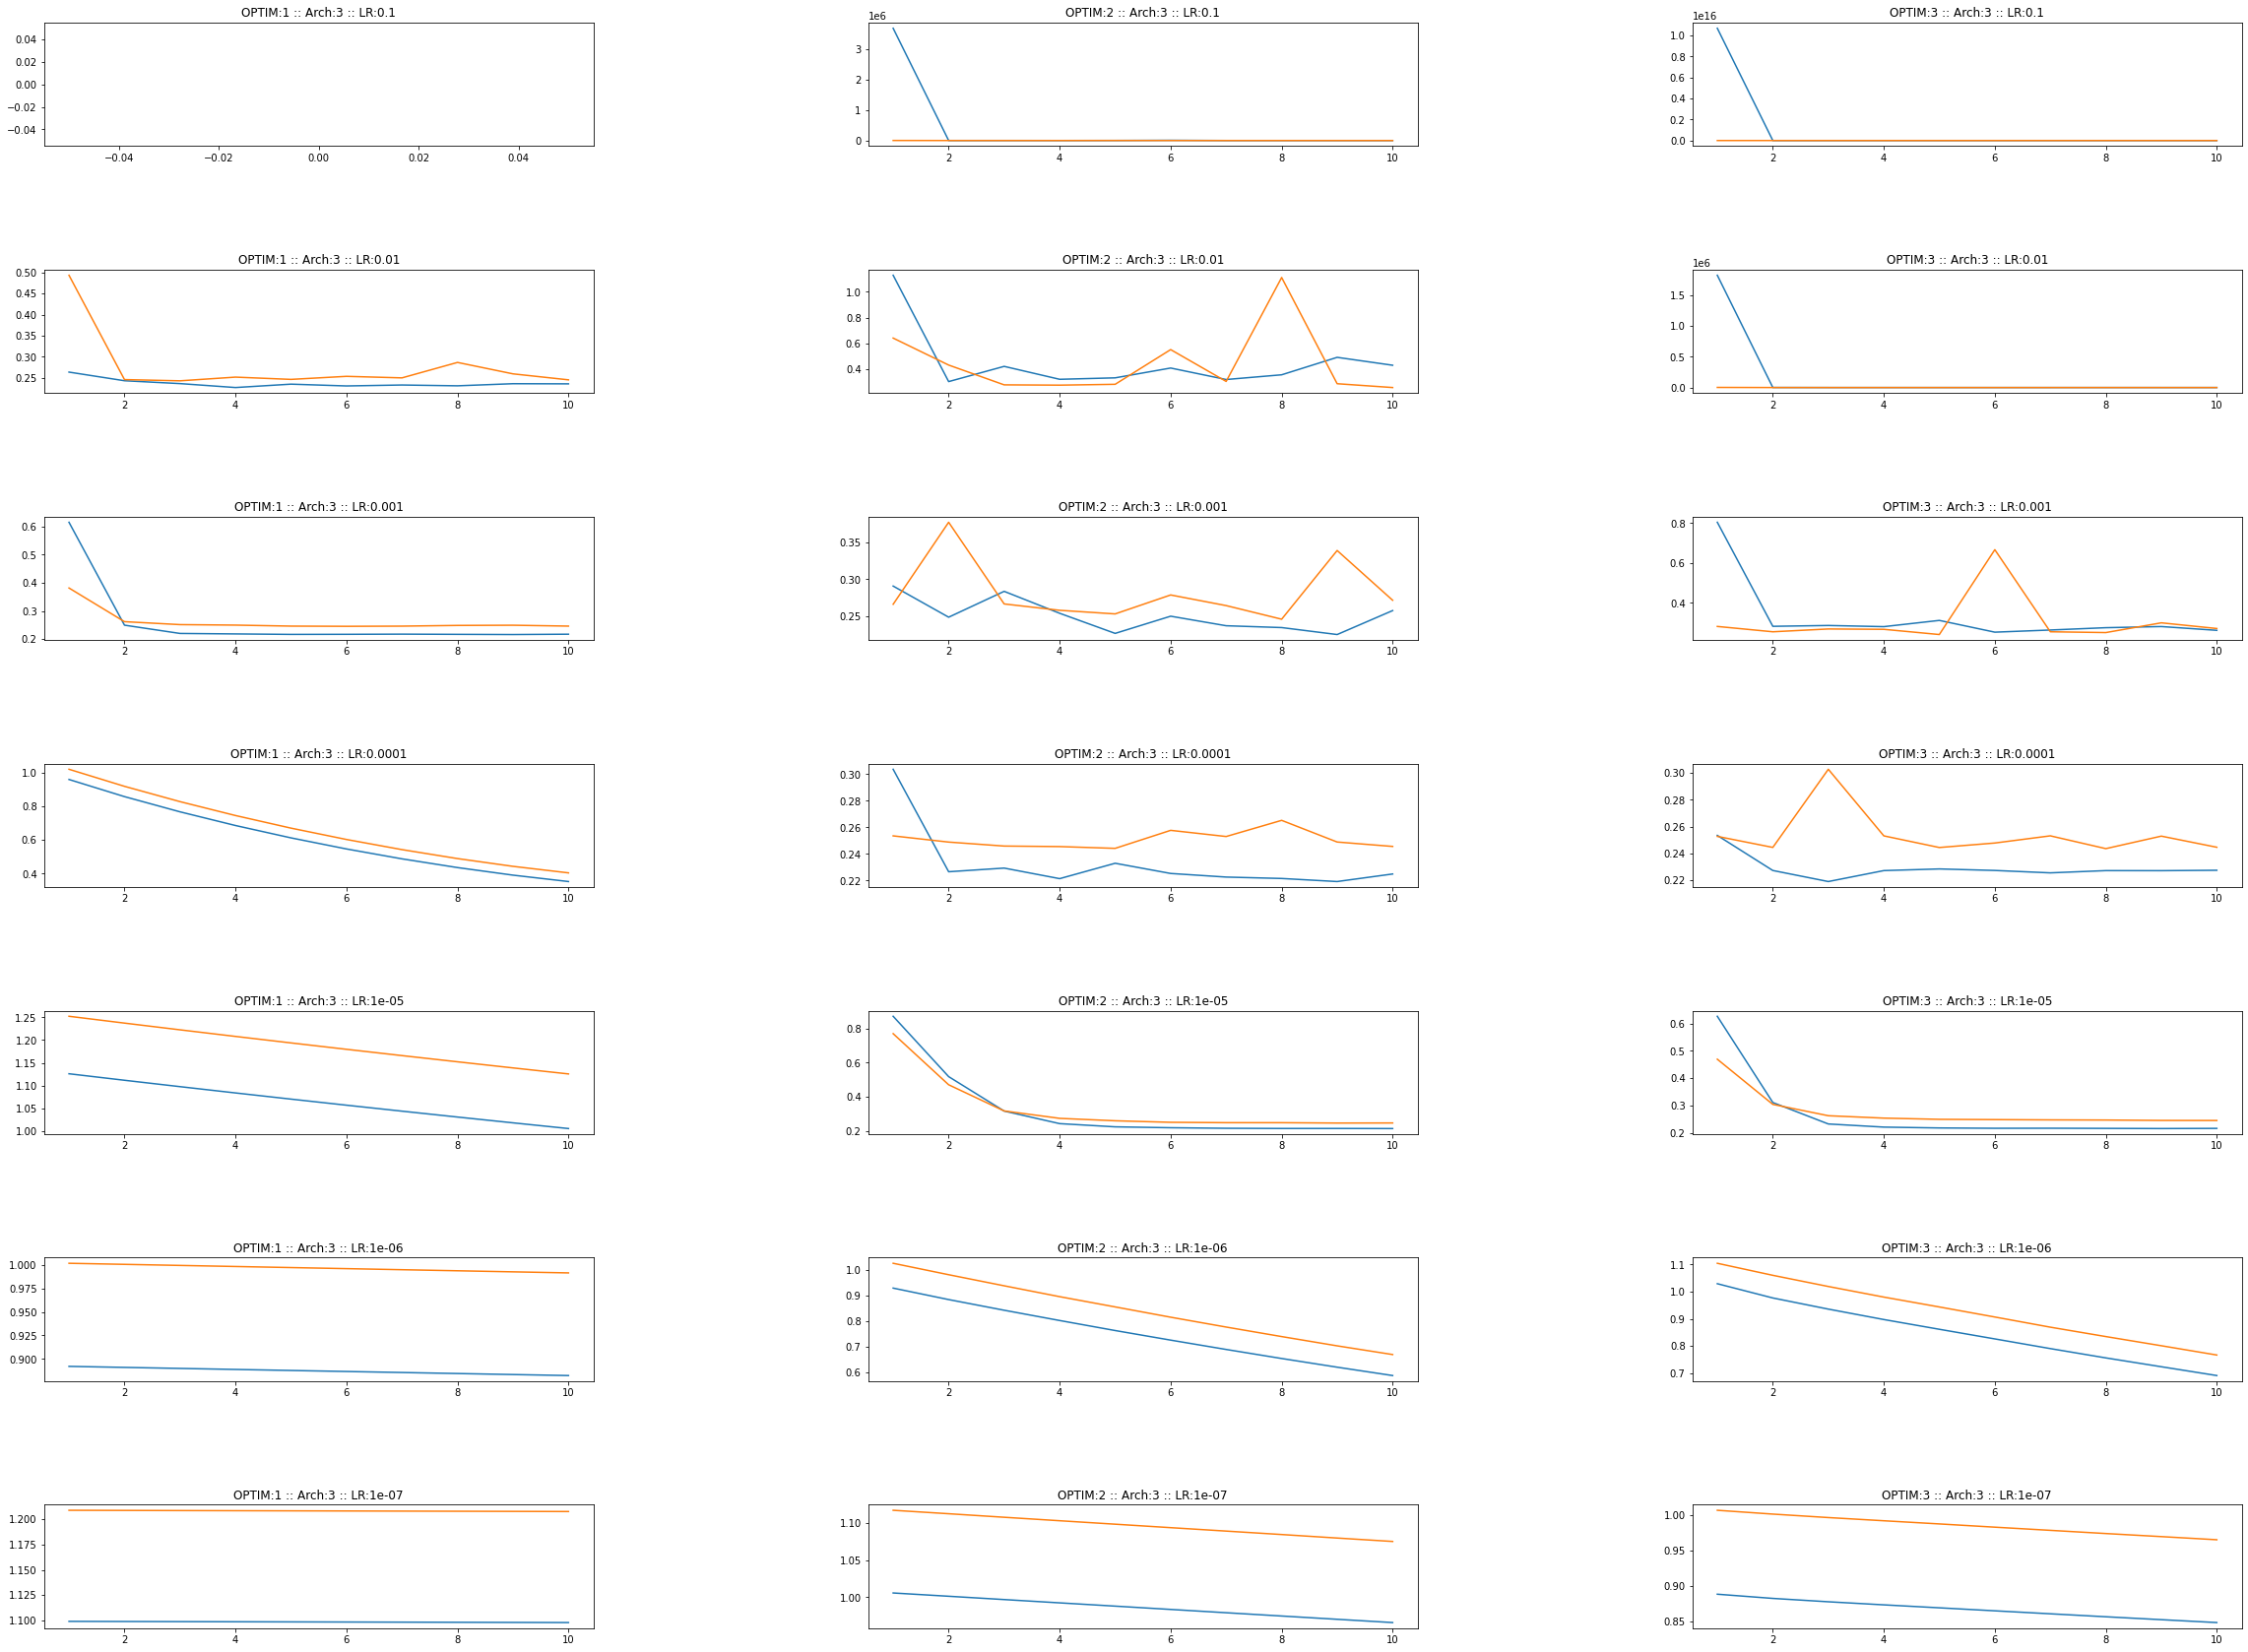

In [ ]:
fig, axs = plt.subplots(len(LRs),len(Optimizers), figsize=(40, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.5)
i, j = 0, 0

for O in Optimizers:
  j = 0
  for LR in LRs:

    model = Model(arch=ARCH)
    criterion = nn.MSELoss()
    
    if O == 1:
      optimizer = torch.optim.SGD(model.parameters(), lr=LR)
    if O == 2:
      optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    if O == 3:
      optimizer = torch.optim.RMSprop(model.parameters(), lr=LR)
    print(f"Now Running - ARCH: {ARCH}; LR: {LR}; Optimizer: {O}")
    train_error, val_error = train(num_epochs, batch_size, criterion, optimizer, model, train_set, val_set)

    axs[j,i].plot(range(1, num_epochs+1), train_error, label = 'Train Loss')
    axs[j,i].plot(range(1, num_epochs+1), val_error, label = 'Val Loss')
    axs[j,i].set_title(f'OPTIM:{O} :: Arch:{ARCH} :: LR:{LR}')

    j += 1
  i += 1


fig.savefig(dir + f'Visualization of Optim Change -- ARCH: {ARCH} Q2.png')

Architecture 4:

In [ ]:
#Define ARCH
ARCH = 4

Now Running - ARCH: 4; LR: 0.1; Optimizer: 1
Epoch [1/10], Train Loss: 0.5071, Val Loss: 0.6027,
Epoch [2/10], Train Loss: 0.4765, Val Loss: 0.4598,
Epoch [3/10], Train Loss: 0.3144, Val Loss: 1.1051,
Epoch [4/10], Train Loss: 0.3458, Val Loss: 0.3109,
Epoch [5/10], Train Loss: 0.3398, Val Loss: 0.3517,
Epoch [6/10], Train Loss: 0.2832, Val Loss: 0.2385,
Epoch [7/10], Train Loss: 0.2457, Val Loss: 0.3694,
Epoch [8/10], Train Loss: 0.3017, Val Loss: 0.1975,
Epoch [9/10], Train Loss: 0.2516, Val Loss: 0.2298,
Epoch [10/10], Train Loss: 0.2977, Val Loss: 0.2834,
Now Running - ARCH: 4; LR: 0.01; Optimizer: 1
Epoch [1/10], Train Loss: 0.9202, Val Loss: 0.8307,
Epoch [2/10], Train Loss: 0.3766, Val Loss: 0.2531,
Epoch [3/10], Train Loss: 0.2052, Val Loss: 0.2057,
Epoch [4/10], Train Loss: 0.1863, Val Loss: 0.2090,
Epoch [5/10], Train Loss: 0.1840, Val Loss: 0.1746,
Epoch [6/10], Train Loss: 0.1840, Val Loss: 0.1824,
Epoch [7/10], Train Loss: 0.1773, Val Loss: 0.2293,
Epoch [8/10], Train Loss

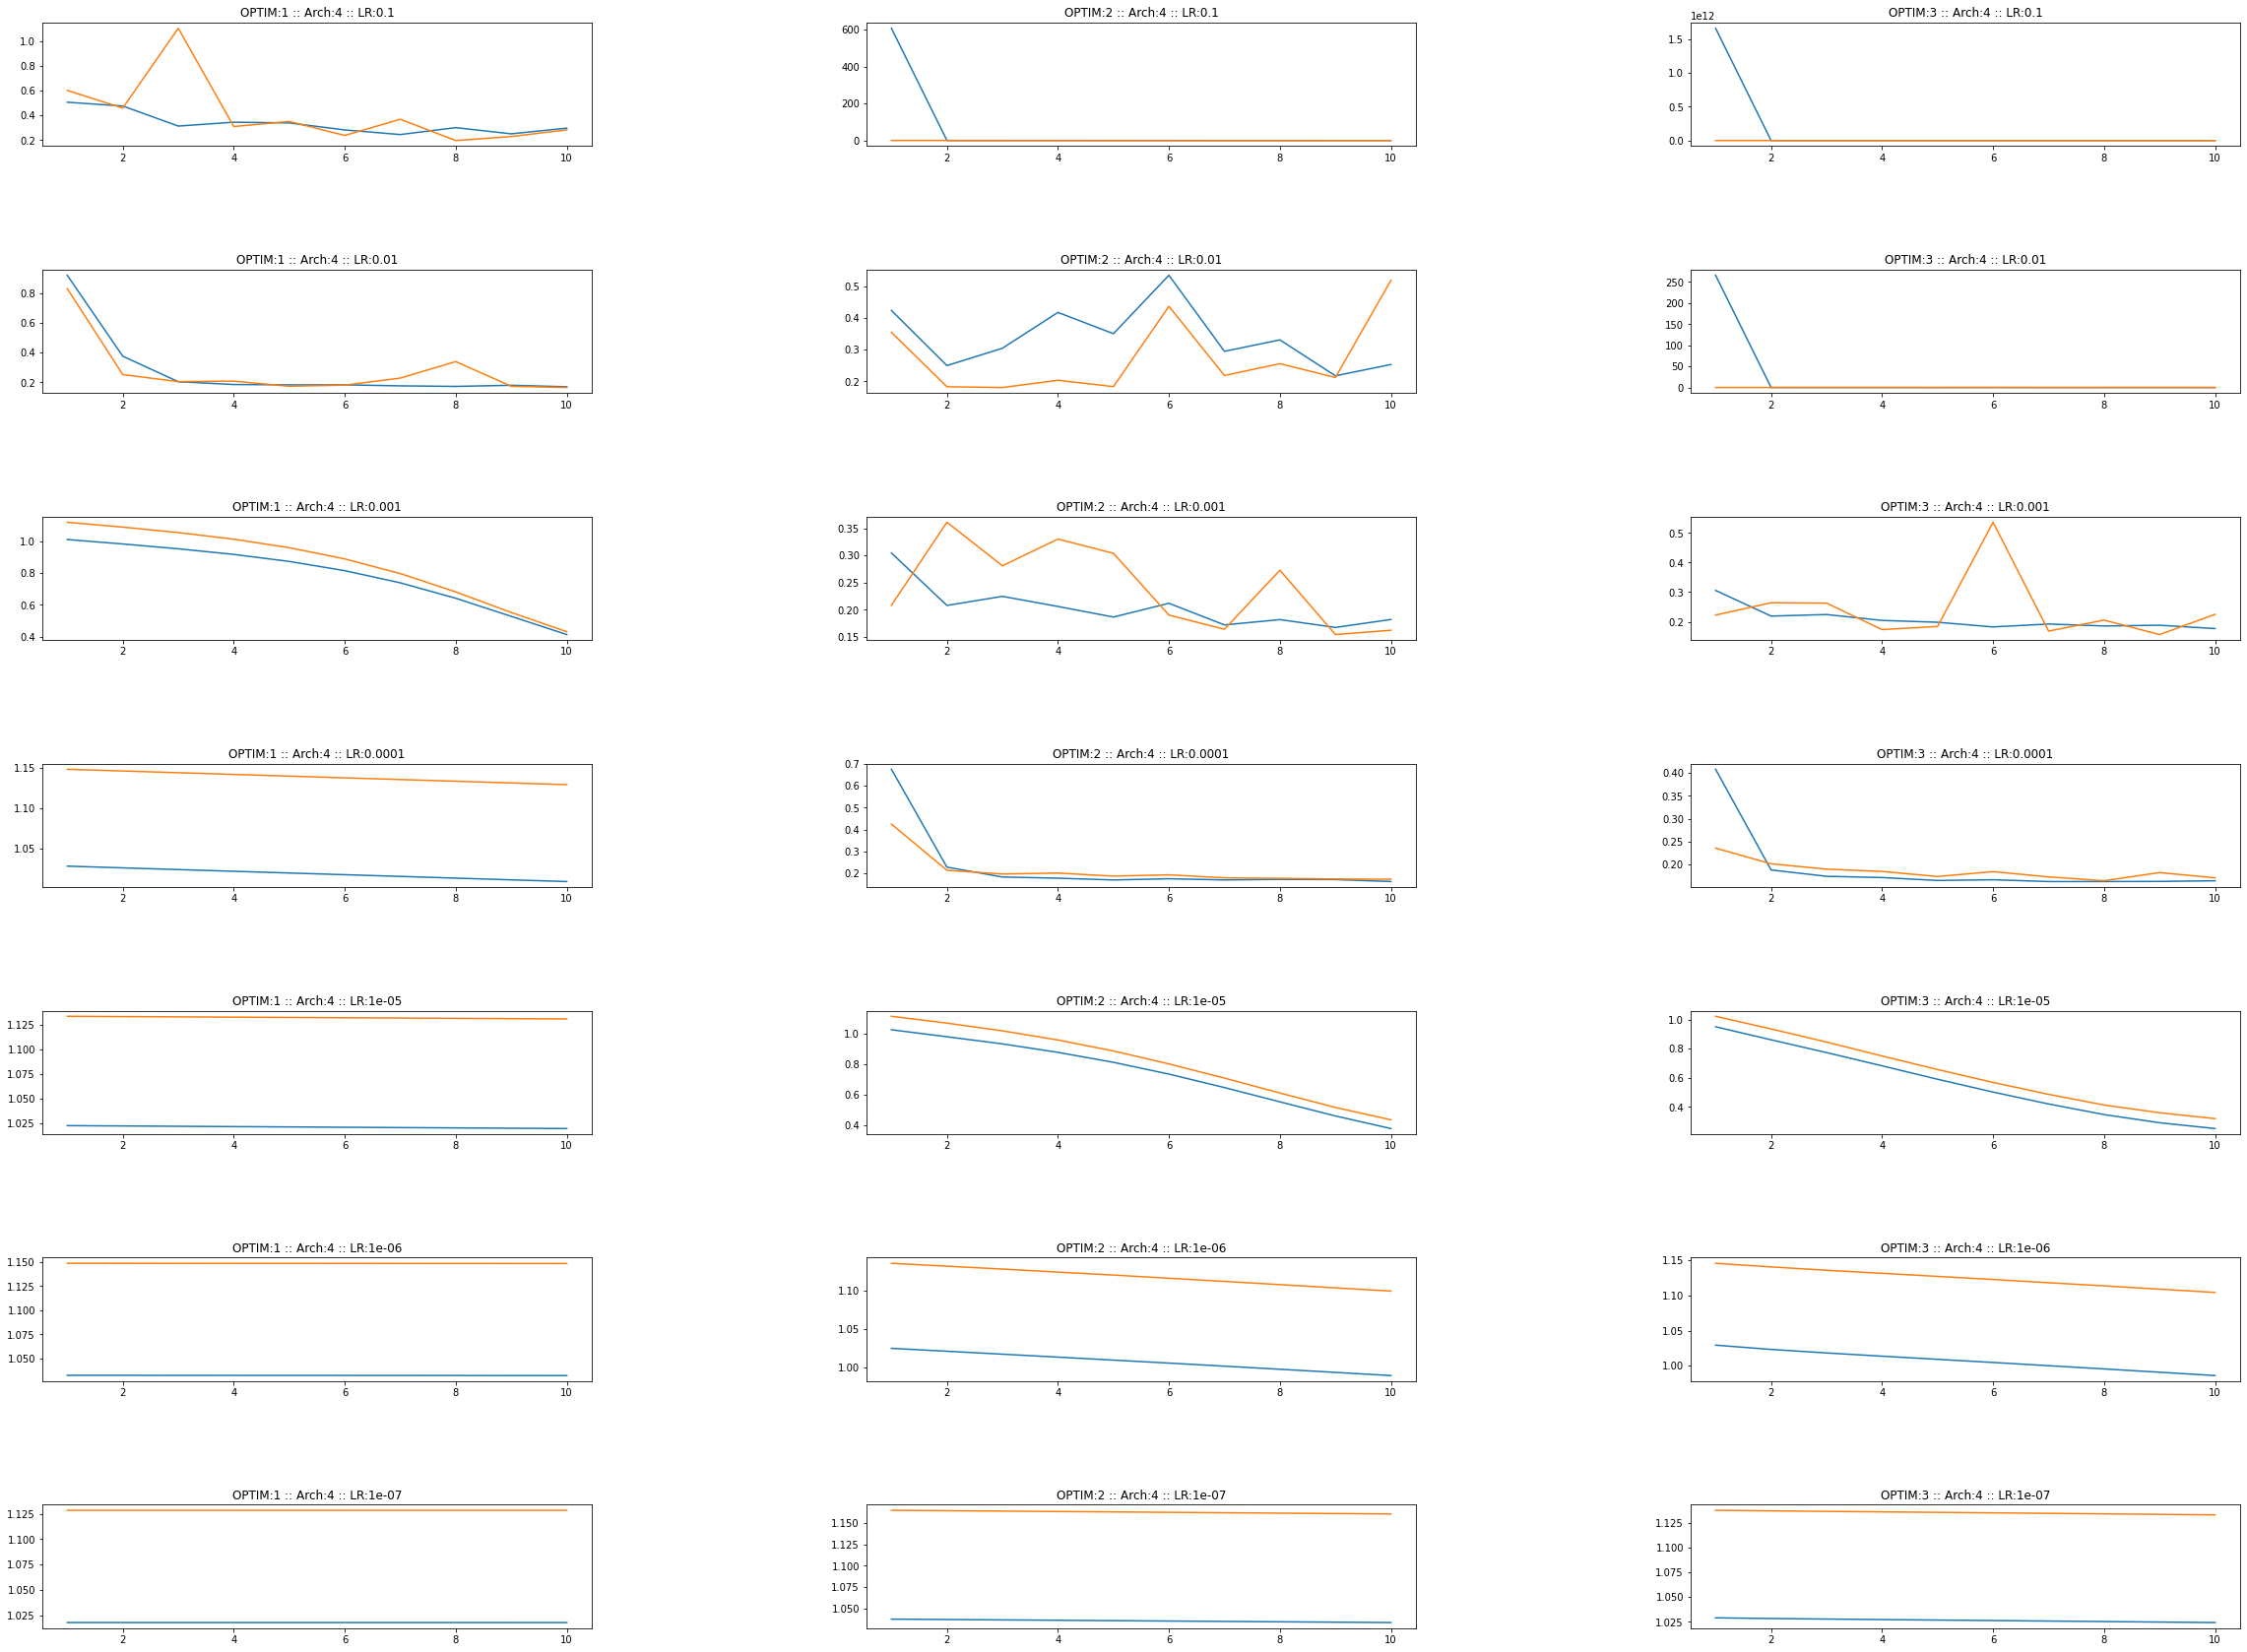

In [ ]:
fig, axs = plt.subplots(len(LRs),len(Optimizers), figsize=(40, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.5)
i, j = 0, 0

for O in Optimizers:
  j = 0
  for LR in LRs:

    model = Model(arch=ARCH)
    criterion = nn.MSELoss()
    
    if O == 1:
      optimizer = torch.optim.SGD(model.parameters(), lr=LR)
    if O == 2:
      optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    if O == 3:
      optimizer = torch.optim.RMSprop(model.parameters(), lr=LR)
    print(f"Now Running - ARCH: {ARCH}; LR: {LR}; Optimizer: {O}")
    train_error, val_error = train(num_epochs, batch_size, criterion, optimizer, model, train_set, val_set)

    axs[j,i].plot(range(1, num_epochs+1), train_error, label = 'Train Loss')
    axs[j,i].plot(range(1, num_epochs+1), val_error, label = 'Val Loss')
    axs[j,i].set_title(f'OPTIM:{O} :: Arch:{ARCH} :: LR:{LR}')

    j += 1
  i += 1


fig.savefig(dir + f'Visualization of Optim Change -- ARCH: {ARCH} Q2.png')

### Exercise 3: Impact of the loss function
As mensioned before in the first problem (binary classification), one can minimize the negative of log-likelihood of the probability for all samples $x$: $$ \sum_{(x,y) \,\in\, \text{Dataset}} - \log p(y | x) $$ If we define $p(y_i | x_i) = \frac{1}{\sqrt{2\pi}}e^{-\frac{(y_i - f(x_i))^2}{2}}$, then the loss function becomes the mean squared error. 

There is another loss function worth to try: the Gaussian likelihood loss function. 
Rather than predicting a single value $y$ given $x$, we predict a probability distribution over possible answers, which helps dealing with ambiguous cases and expressing uncertainty. To do this, for each possible input $x$, the network will output the parameters of the distribution modeling $p(y|x)$. For instance in our case, we choose to model output distributions with Gaussian distributions $\mathcal{N}(\mu, \sigma)$, which are parameterized by their mean $\mu$ and their standard deviation $\sigma$. Therefore for each input $x$ we have to output two quantities: $\mu(x)$ and $\sigma(x)$. The probability becomes: $$p(y_i | x_i) = \frac{1}{\sqrt{2\pi \sigma(x_i)^2}}e^{-\frac{(y_i - \mu(x_i))^2}{2\sigma(x_i)^2}}$$ Then the loss function becomes: $$L =\sum\limits_{i=1}^{N}  \frac{1}{2} \log ( 2\pi\sigma_i^{2} ) + \frac{1}{2\sigma_i^{2}}  (y_{i} - \mu_i)^{2}$$ If we set $\sigma=1$, we obtain MSE the loss function. 

* Try to replace the loss function with this one, and compare the differences between the two losses.
 
* **Hints**: 
    * You need two outputs of your network, one represents the $\mu(x_i)$, another for $\log( \sigma(x_i)^2 )$ (better for optimization) 
    * Try deeper models, or you will not predict the variance $\sigma$ well. 


In [ ]:
LOSS = torch.nn.GaussianNLLLoss()

In [ ]:
def train_new(num_epochs, batch_size, criterion, optimizer, model, dataset, val_set):
    train_error = []
    val_error = []
    train_loader = DataLoader(dataset, batch_size, shuffle=True)
    for epoch in range(num_epochs):
        epoch_average_loss = 0.0
        model.train() # Indicates to the network we are in training mode
        for (X, y) in (train_loader):

            y_pre, var = torch.split(model(X).t(), 1, dim =0)
            var = torch.exp(var)
            loss = criterion(y_pre, y, var)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_average_loss += loss.item() * batch_size / len(train_set)

        train_error.append(epoch_average_loss)

        epoch_average_loss_val = 0.0
        model.eval() # Adding Validation Errors
        val_loader = DataLoader(val_set, batch_size, shuffle=True)
        for (X, y) in val_loader:
          y_pre, var = torch.split(model(X).t(), 1, dim =0)
          var = torch.exp(var)
          loss = criterion(y_pre, y, var)
          epoch_average_loss_val += loss.item() * batch_size / len(val_set)
        val_error.append(epoch_average_loss_val)
        print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f},'.format(epoch+1, num_epochs, epoch_average_loss,epoch_average_loss_val ))
  
    return train_error, val_error

In [ ]:
# Choose the hyperparameters for training: 
num_epochs = 20
batch_size = 10

Architecture 1:

In [ ]:
#Define ARCH
ARCH = 1
NODE = 2

Now Running - ARCH: 1; LR: 0.1; Optimizer: 1
Epoch [1/20], Train Loss: nan, Val Loss: nan,
Epoch [2/20], Train Loss: nan, Val Loss: nan,
Epoch [3/20], Train Loss: nan, Val Loss: nan,
Epoch [4/20], Train Loss: nan, Val Loss: nan,
Epoch [5/20], Train Loss: nan, Val Loss: nan,
Epoch [6/20], Train Loss: nan, Val Loss: nan,
Epoch [7/20], Train Loss: nan, Val Loss: nan,
Epoch [8/20], Train Loss: nan, Val Loss: nan,
Epoch [9/20], Train Loss: nan, Val Loss: nan,
Epoch [10/20], Train Loss: nan, Val Loss: nan,
Epoch [11/20], Train Loss: nan, Val Loss: nan,
Epoch [12/20], Train Loss: nan, Val Loss: nan,
Epoch [13/20], Train Loss: nan, Val Loss: nan,
Epoch [14/20], Train Loss: nan, Val Loss: nan,
Epoch [15/20], Train Loss: nan, Val Loss: nan,
Epoch [16/20], Train Loss: nan, Val Loss: nan,
Epoch [17/20], Train Loss: nan, Val Loss: nan,
Epoch [18/20], Train Loss: nan, Val Loss: nan,
Epoch [19/20], Train Loss: nan, Val Loss: nan,
Epoch [20/20], Train Loss: nan, Val Loss: nan,
Now Running - ARCH: 1; L

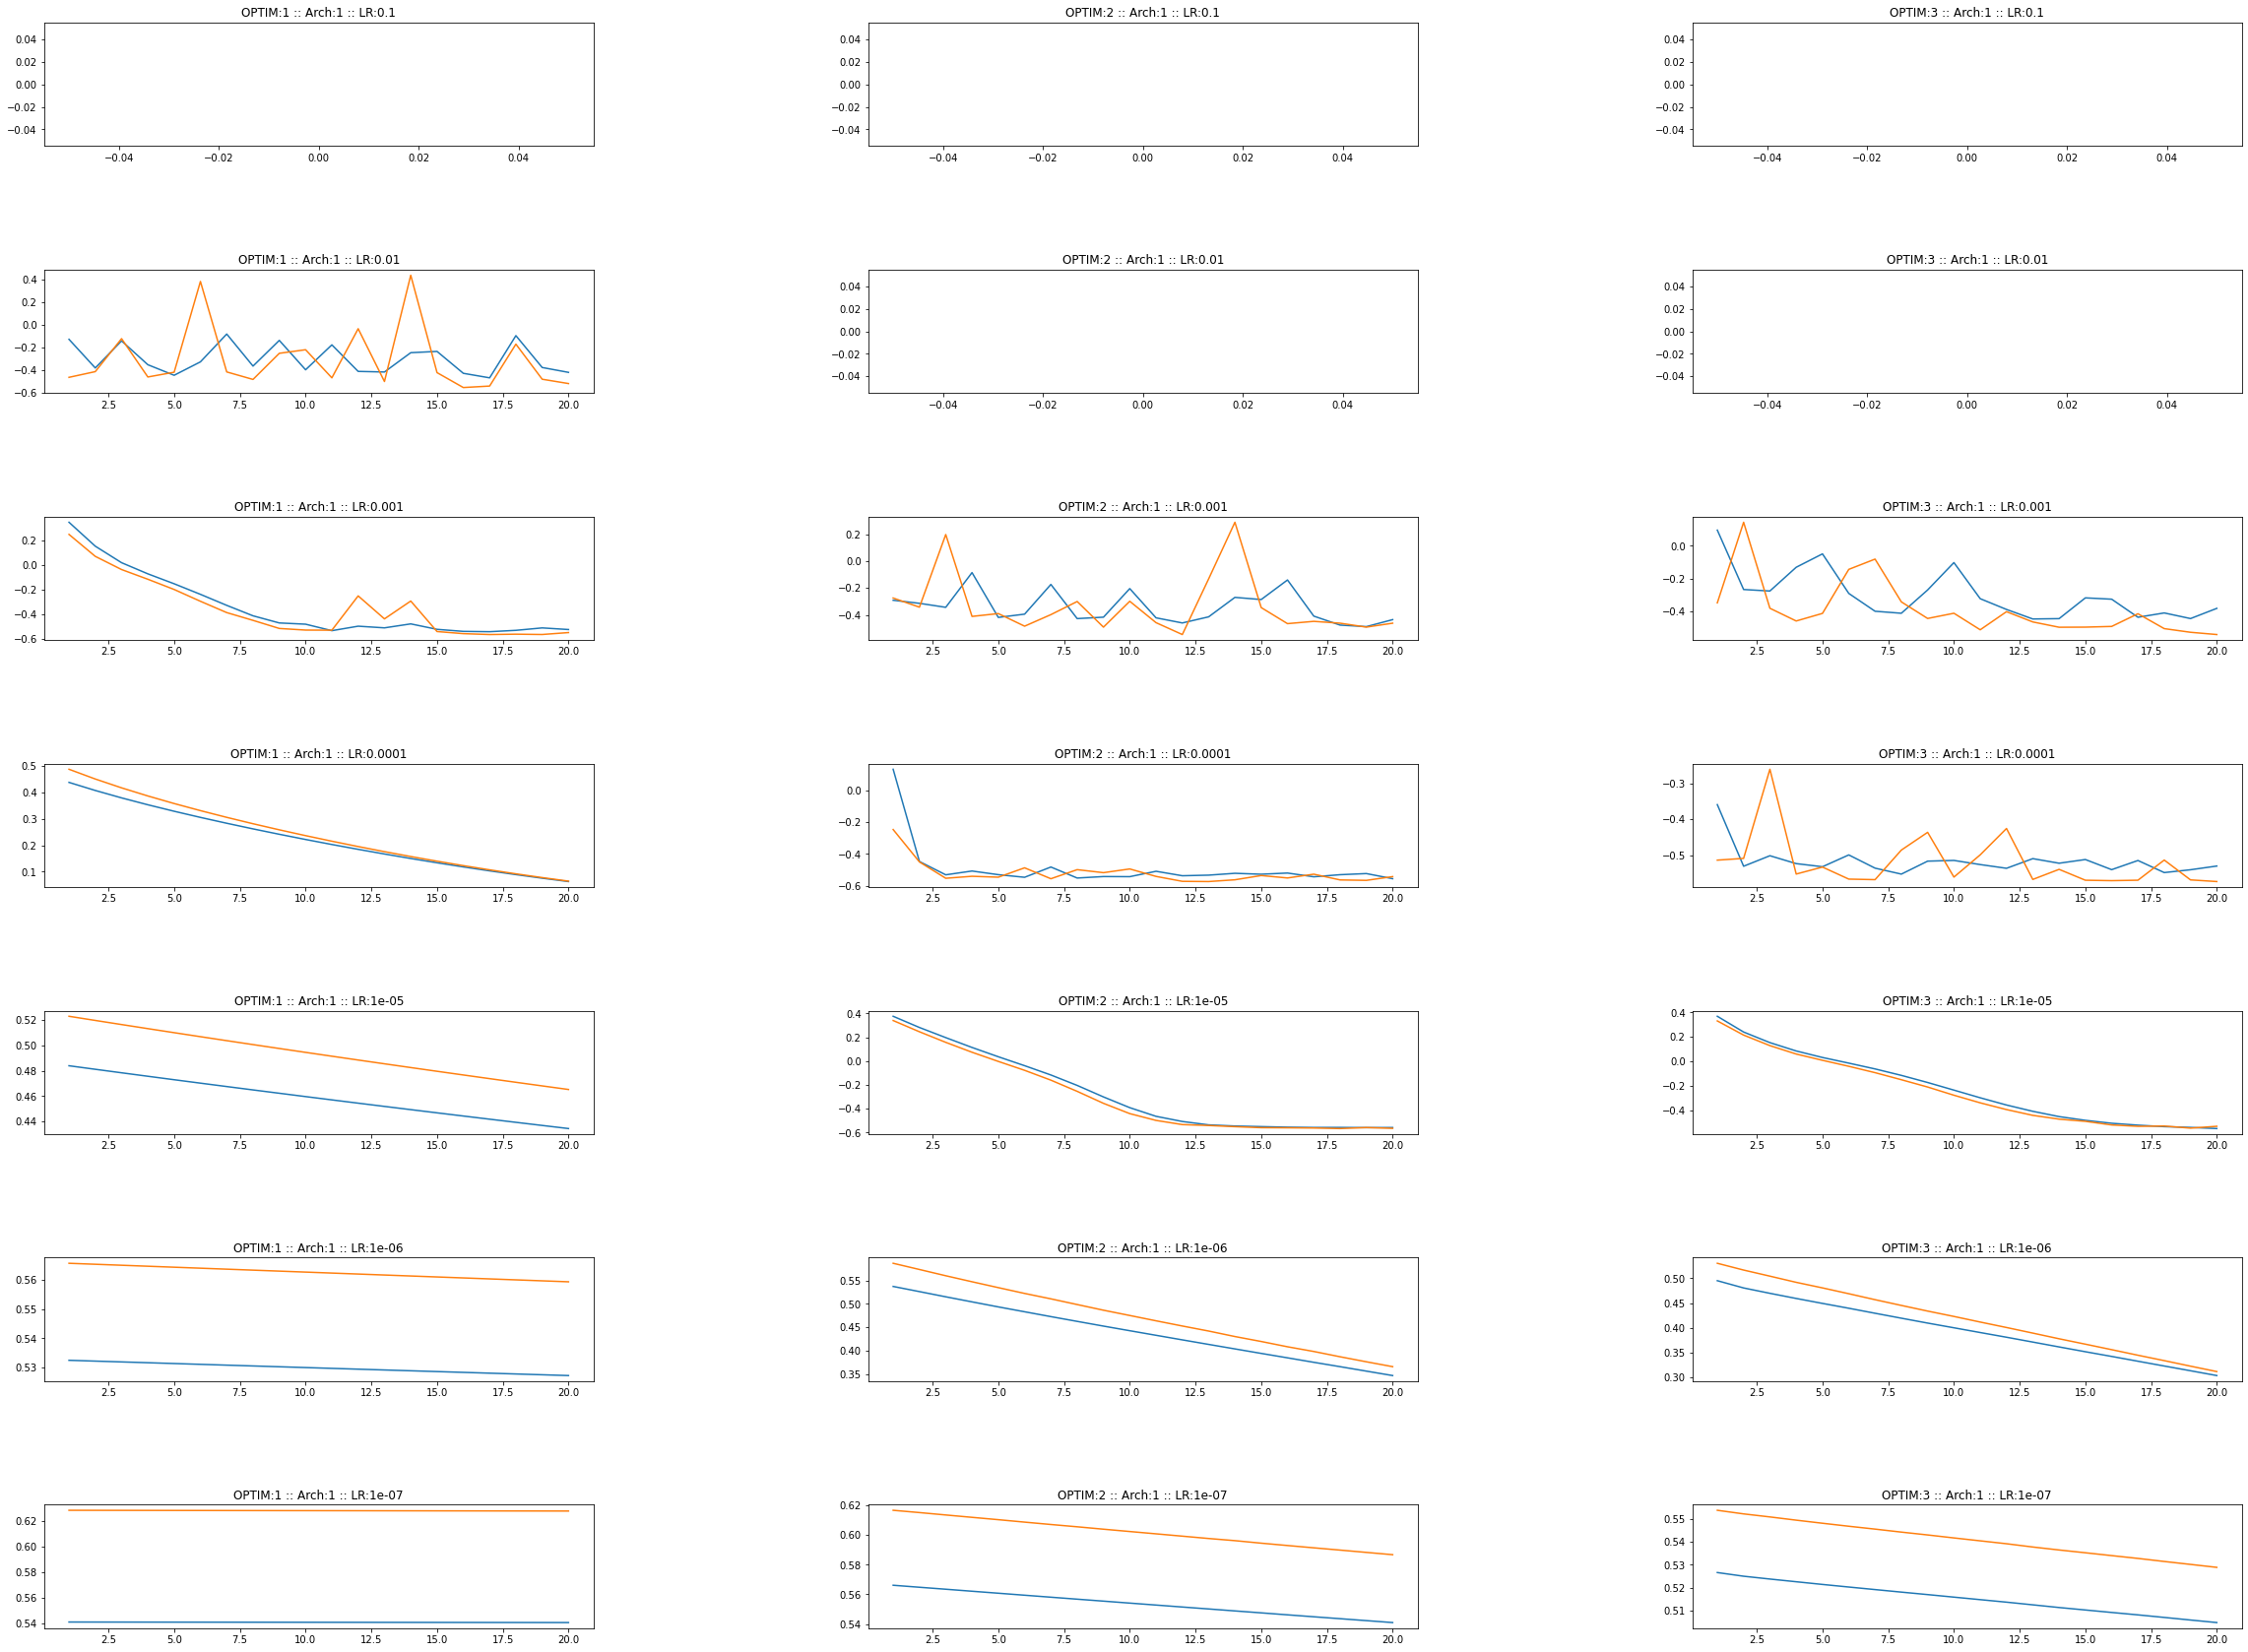

In [ ]:
fig, axs = plt.subplots(len(LRs),len(Optimizers), figsize=(40, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.5)
i, j = 0, 0

for O in Optimizers:
  j = 0
  for LR in LRs:

    model = Model(arch = ARCH, end_node = NODE)
    criterion = LOSS

    if O == 1:
      optimizer = torch.optim.SGD(model.parameters(), lr=LR)
    if O == 2:
      optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    if O == 3:
      optimizer = torch.optim.RMSprop(model.parameters(), lr=LR)

    print(f"Now Running - ARCH: {ARCH}; LR: {LR}; Optimizer: {O}")
    train_error, val_error = train_new(num_epochs, batch_size, criterion, optimizer, model, train_set, val_set)

    axs[j,i].plot(range(1, num_epochs+1), train_error, label = 'Train Loss')
    axs[j,i].plot(range(1, num_epochs+1), val_error, label = 'Val Loss')
    axs[j,i].set_title(f'OPTIM:{O} :: Arch:{ARCH} :: LR:{LR}')

    j += 1
  i += 1


fig.savefig(dir + f'Visualization of Optim Change -- ARCH: {ARCH} Q2.png')

Architecture 2:

In [ ]:
#Define ARCH
ARCH = 2
NODE = 2

Now Running - ARCH: 2; LR: 0.1; Optimizer: 1
Epoch [1/20], Train Loss: 0.0002, Val Loss: -0.2430,
Epoch [2/20], Train Loss: -0.2260, Val Loss: -0.5278,
Epoch [3/20], Train Loss: -0.3033, Val Loss: -0.5022,
Epoch [4/20], Train Loss: -0.3068, Val Loss: -0.5065,
Epoch [5/20], Train Loss: -0.2679, Val Loss: -0.2314,
Epoch [6/20], Train Loss: -0.3348, Val Loss: -0.6066,
Epoch [7/20], Train Loss: -0.3738, Val Loss: -0.6320,
Epoch [8/20], Train Loss: -0.3311, Val Loss: 0.1266,
Epoch [9/20], Train Loss: -0.3140, Val Loss: -0.3321,
Epoch [10/20], Train Loss: -0.3069, Val Loss: -0.2857,
Epoch [11/20], Train Loss: -0.4214, Val Loss: -0.5765,
Epoch [12/20], Train Loss: -0.4091, Val Loss: 0.2551,
Epoch [13/20], Train Loss: -0.3587, Val Loss: -0.4953,
Epoch [14/20], Train Loss: -0.3995, Val Loss: -0.4197,
Epoch [15/20], Train Loss: -0.3842, Val Loss: 0.1394,
Epoch [16/20], Train Loss: -0.4144, Val Loss: -0.6167,
Epoch [17/20], Train Loss: -0.3353, Val Loss: -0.4145,
Epoch [18/20], Train Loss: -0.419

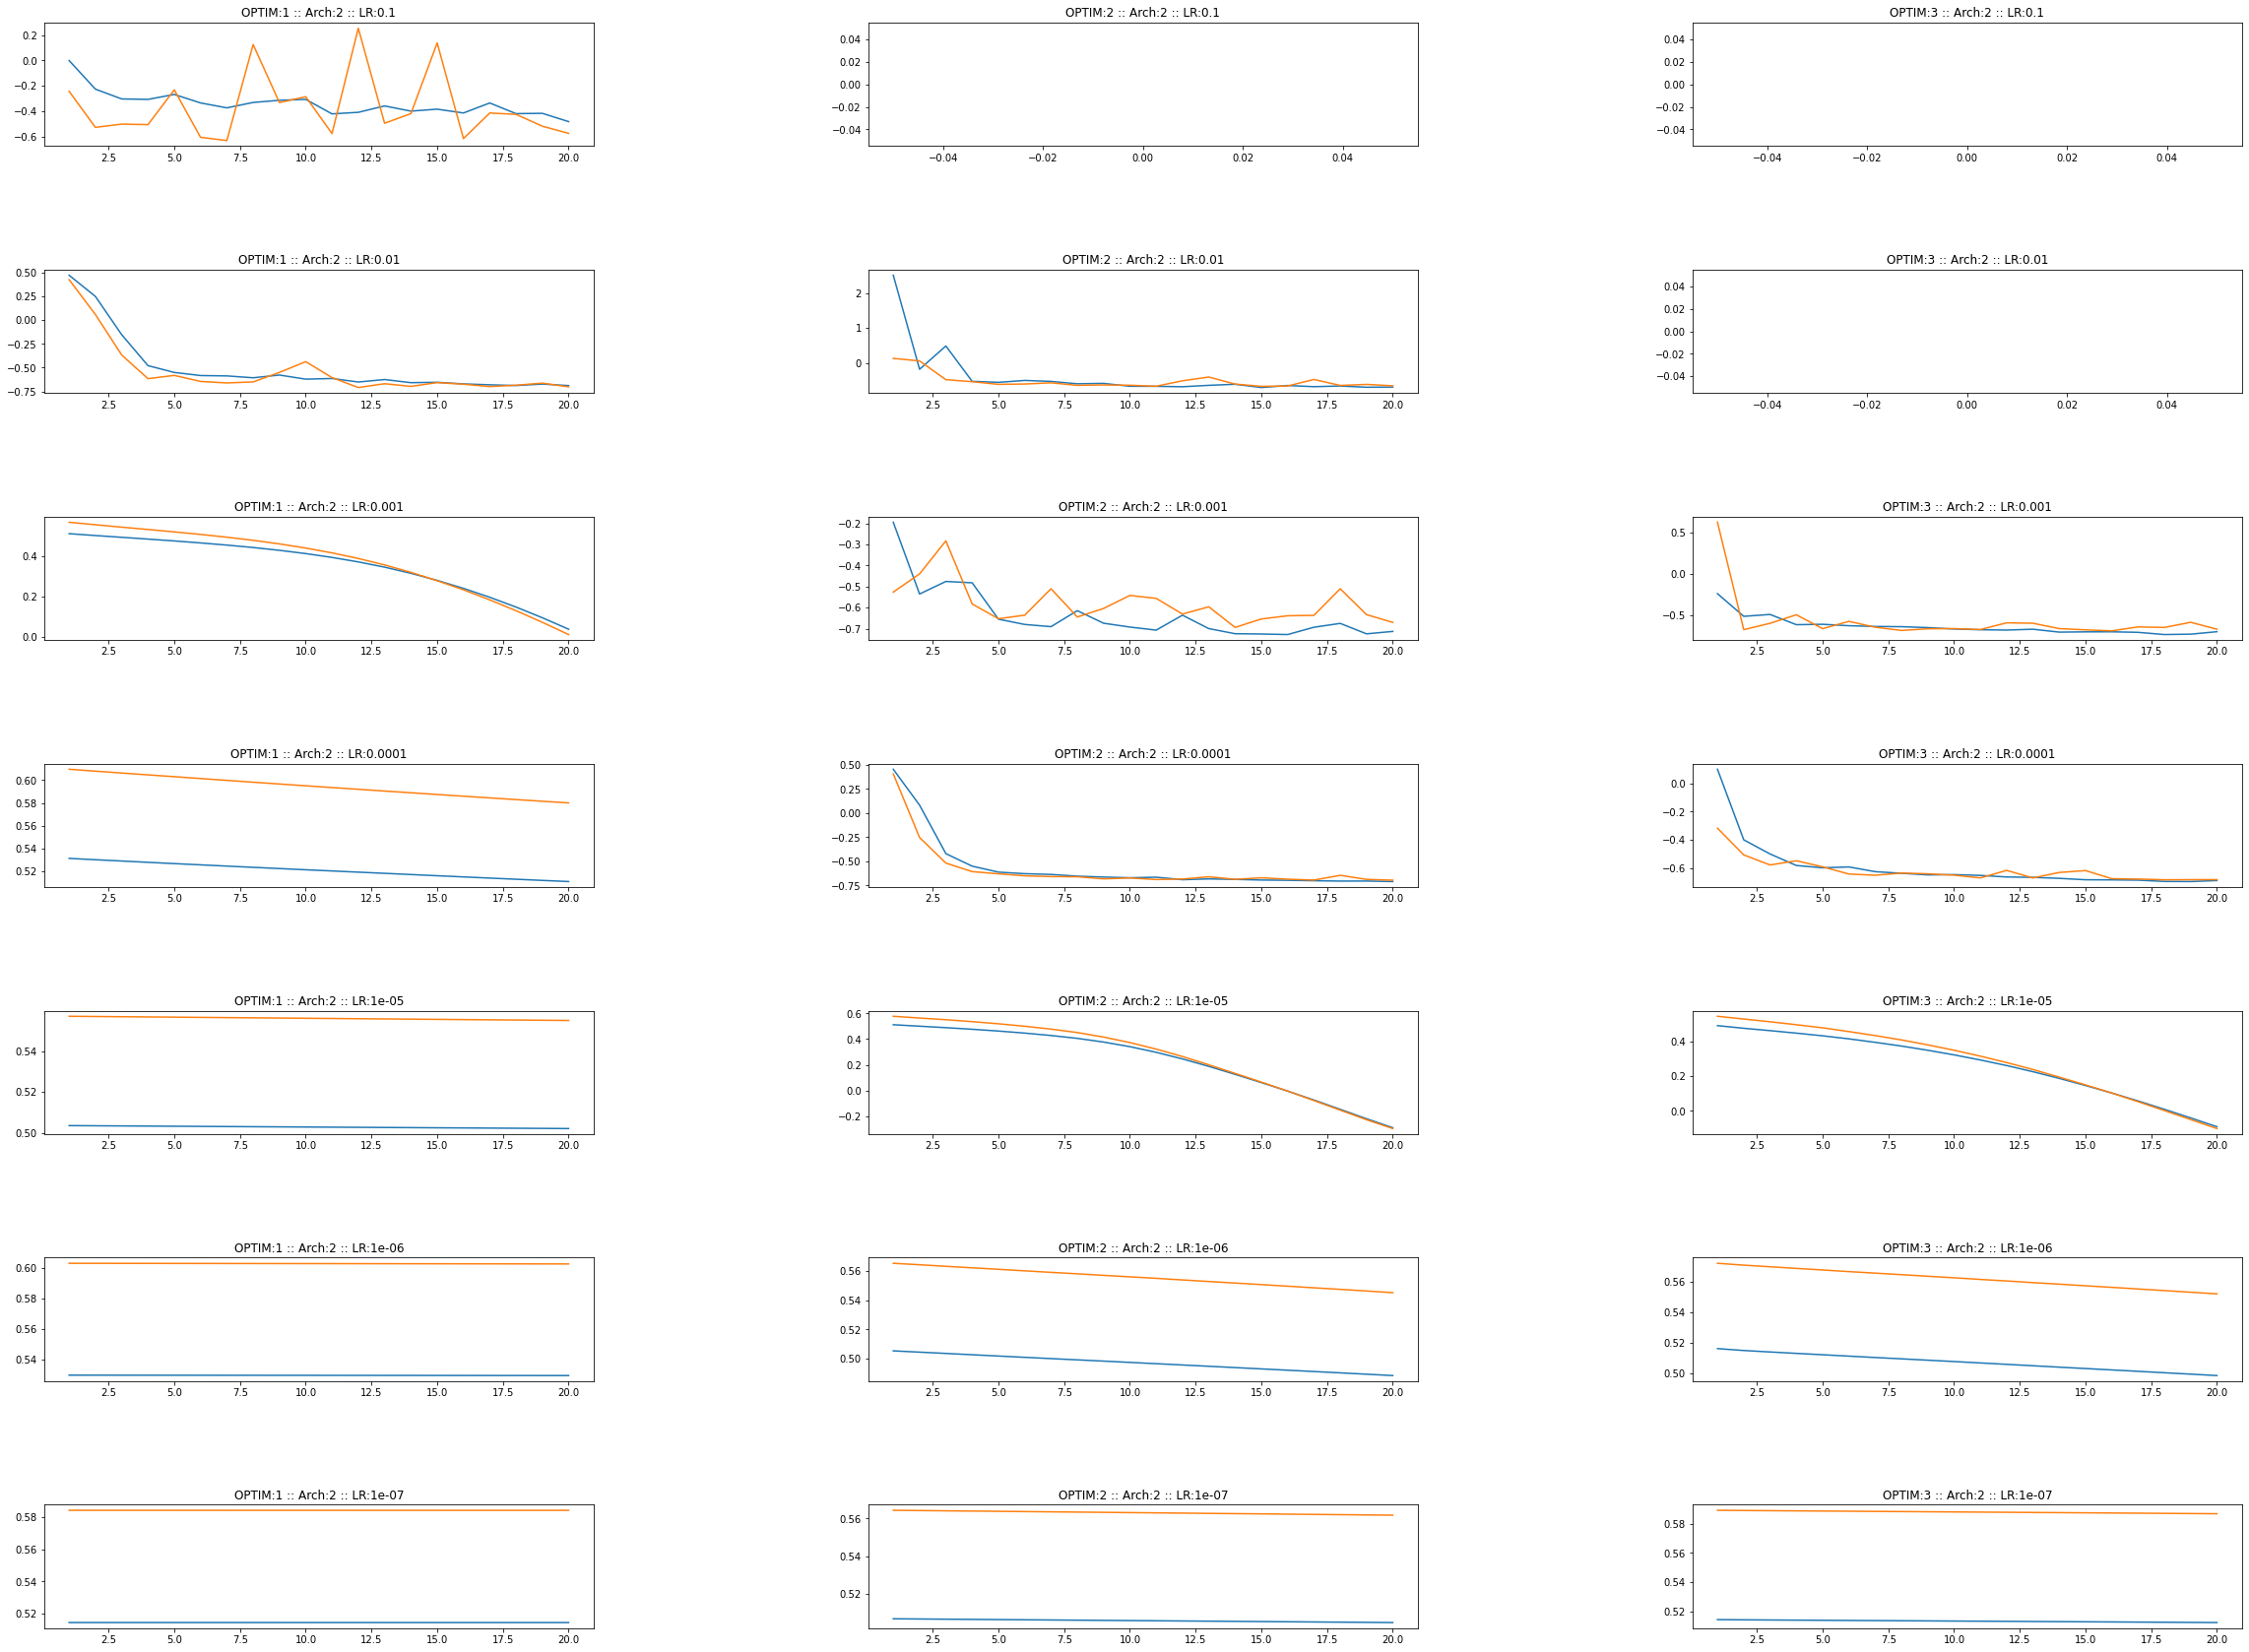

In [ ]:
fig, axs = plt.subplots(len(LRs),len(Optimizers), figsize=(40, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.5)
i, j = 0, 0

for O in Optimizers:
  j = 0
  for LR in LRs:

    model = Model(arch = ARCH, end_node = NODE)
    criterion = LOSS

    if O == 1:
      optimizer = torch.optim.SGD(model.parameters(), lr=LR)
    if O == 2:
      optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    if O == 3:
      optimizer = torch.optim.RMSprop(model.parameters(), lr=LR)

    print(f"Now Running - ARCH: {ARCH}; LR: {LR}; Optimizer: {O}")
    train_error, val_error = train_new(num_epochs, batch_size, criterion, optimizer, model, train_set, val_set)

    axs[j,i].plot(range(1, num_epochs+1), train_error, label = 'Train Loss')
    axs[j,i].plot(range(1, num_epochs+1), val_error, label = 'Val Loss')
    axs[j,i].set_title(f'OPTIM:{O} :: Arch:{ARCH} :: LR:{LR}')

    j += 1
  i += 1


fig.savefig(dir + f'Visualization of Optim Change -- ARCH: {ARCH} Q2.png')

Architecture 3:


In [ ]:
#Define ARCH
ARCH = 3
NODE = 2

Now Running - ARCH: 3; LR: 0.1; Optimizer: 1
Epoch [1/20], Train Loss: nan, Val Loss: nan,
Epoch [2/20], Train Loss: nan, Val Loss: nan,
Epoch [3/20], Train Loss: nan, Val Loss: nan,
Epoch [4/20], Train Loss: nan, Val Loss: nan,
Epoch [5/20], Train Loss: nan, Val Loss: nan,
Epoch [6/20], Train Loss: nan, Val Loss: nan,
Epoch [7/20], Train Loss: nan, Val Loss: nan,
Epoch [8/20], Train Loss: nan, Val Loss: nan,
Epoch [9/20], Train Loss: nan, Val Loss: nan,
Epoch [10/20], Train Loss: nan, Val Loss: nan,
Epoch [11/20], Train Loss: nan, Val Loss: nan,
Epoch [12/20], Train Loss: nan, Val Loss: nan,
Epoch [13/20], Train Loss: nan, Val Loss: nan,
Epoch [14/20], Train Loss: nan, Val Loss: nan,
Epoch [15/20], Train Loss: nan, Val Loss: nan,
Epoch [16/20], Train Loss: nan, Val Loss: nan,
Epoch [17/20], Train Loss: nan, Val Loss: nan,
Epoch [18/20], Train Loss: nan, Val Loss: nan,
Epoch [19/20], Train Loss: nan, Val Loss: nan,
Epoch [20/20], Train Loss: nan, Val Loss: nan,
Now Running - ARCH: 3; L

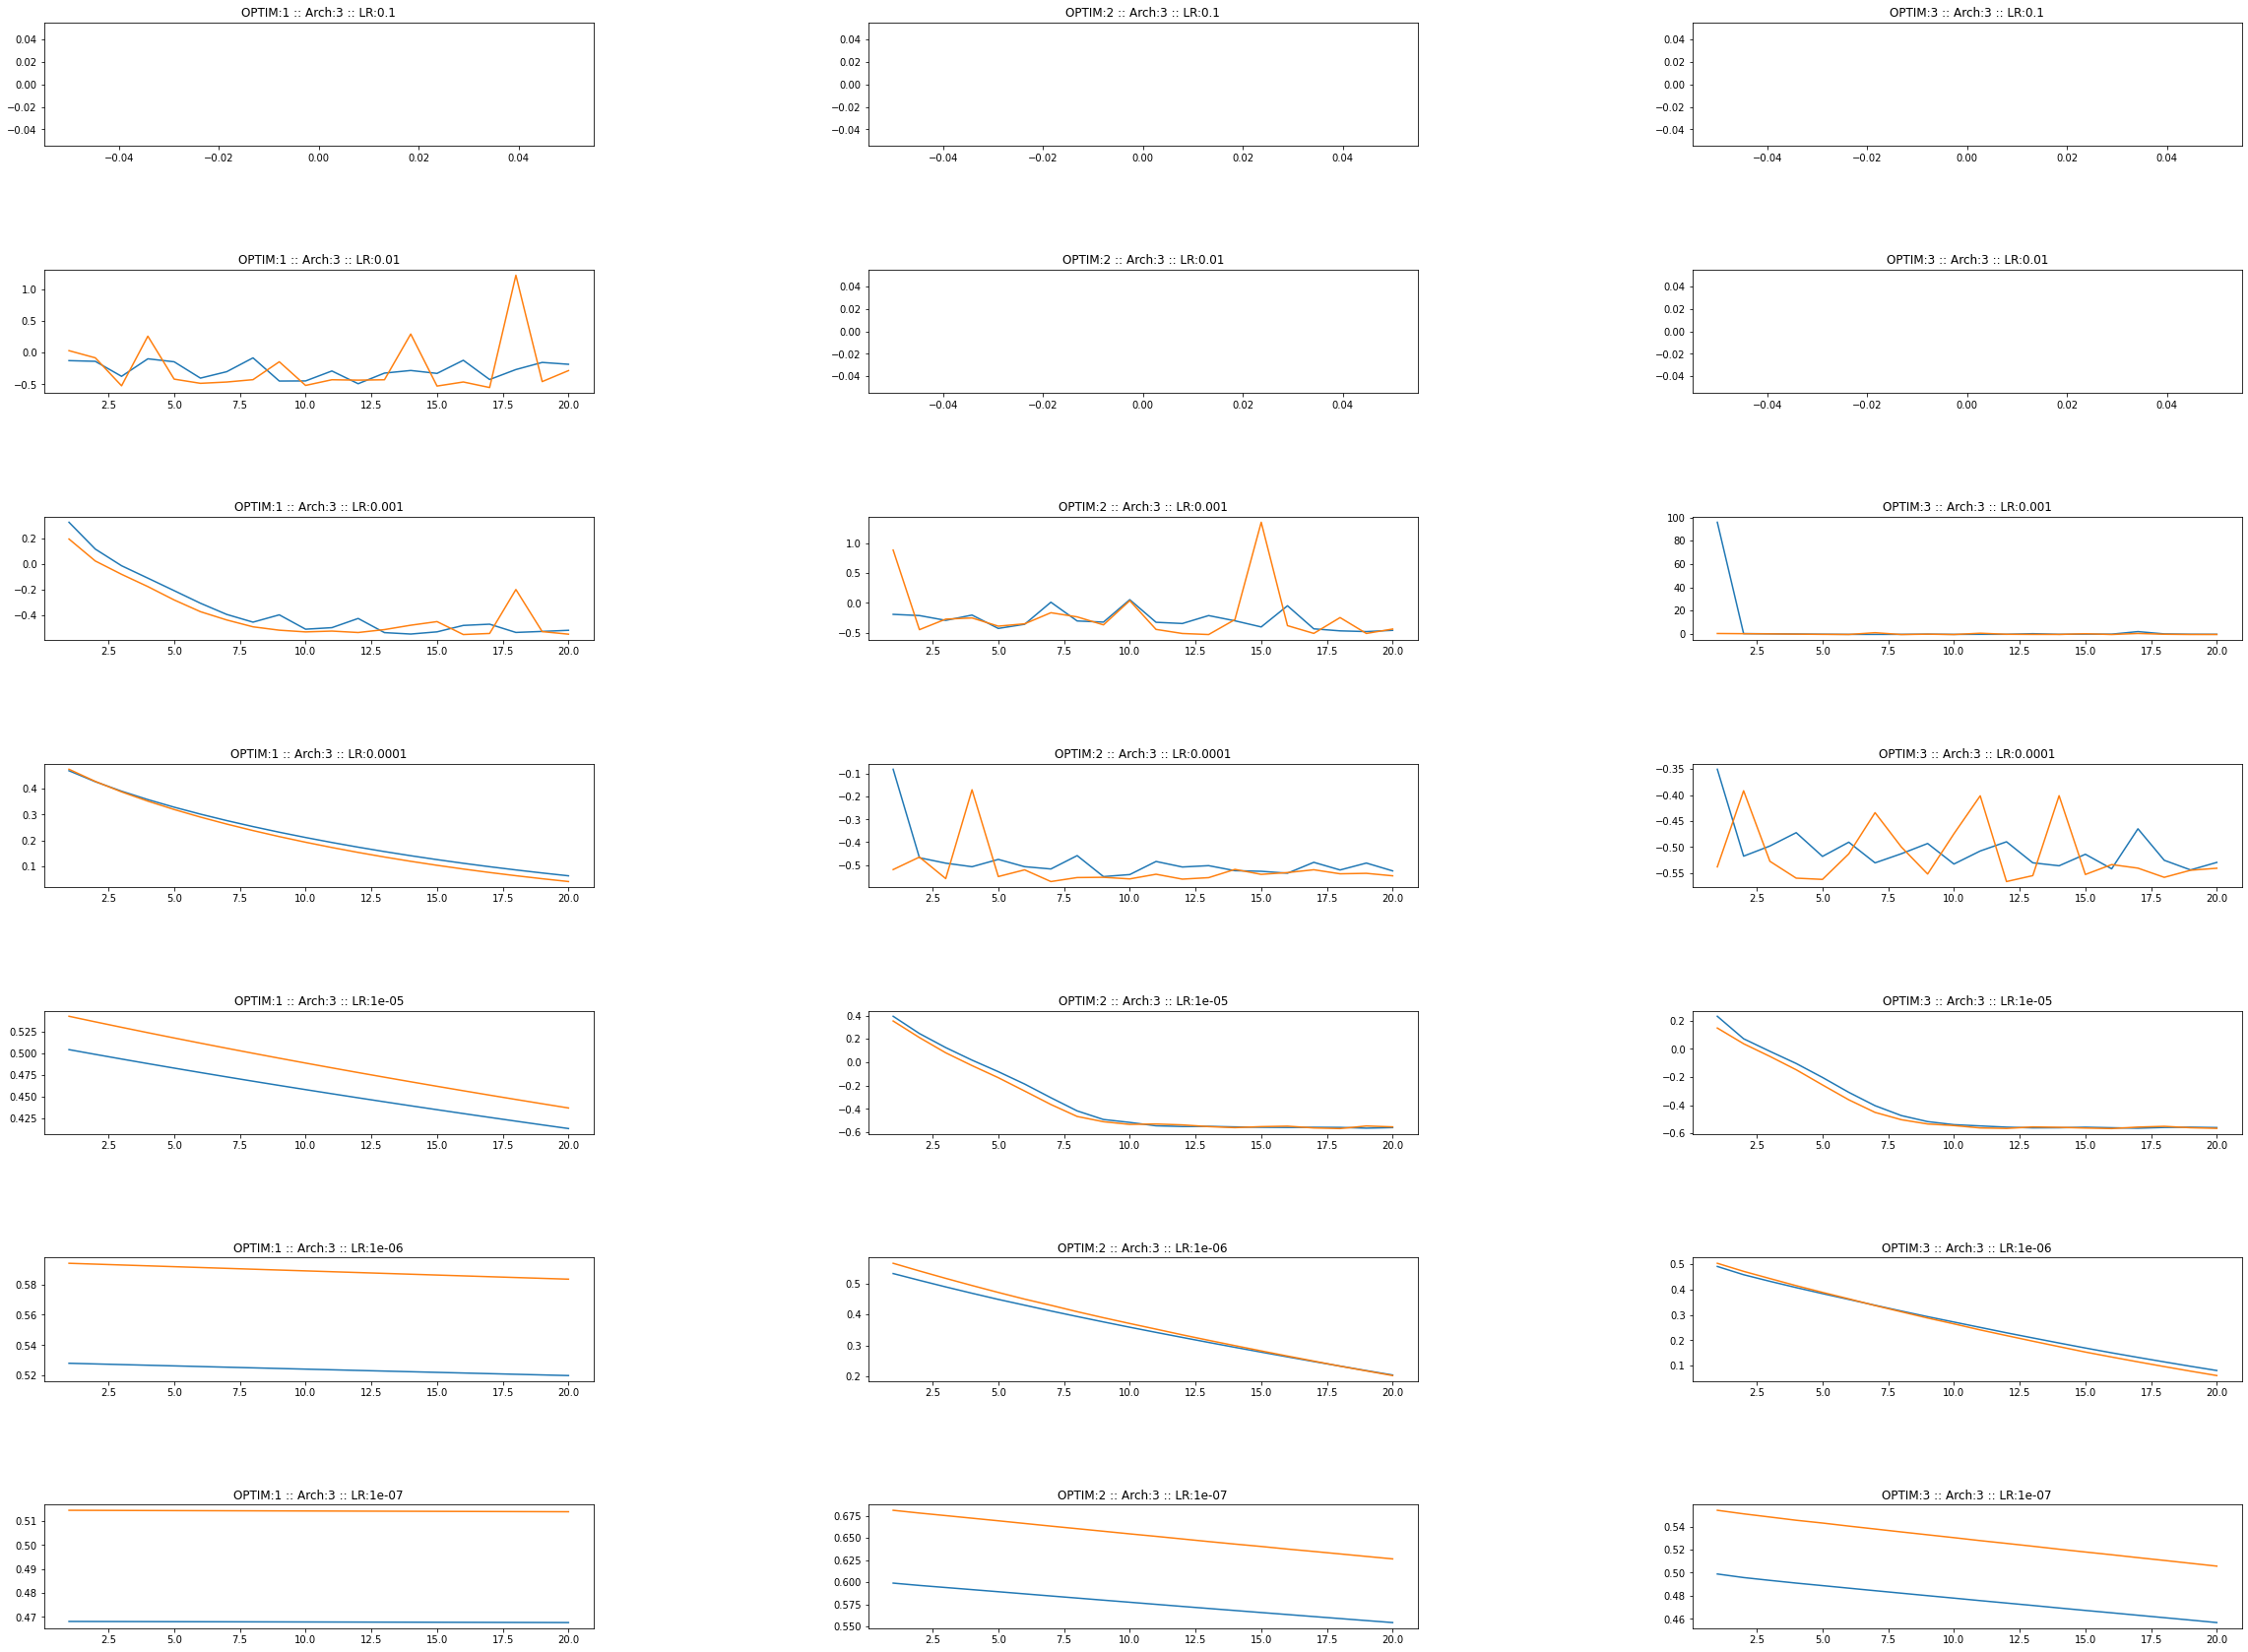

In [ ]:
fig, axs = plt.subplots(len(LRs),len(Optimizers), figsize=(40, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.5)
i, j = 0, 0

for O in Optimizers:
  j = 0
  for LR in LRs:

    model = Model(arch = ARCH, end_node = NODE)
    criterion = LOSS

    if O == 1:
      optimizer = torch.optim.SGD(model.parameters(), lr=LR)
    if O == 2:
      optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    if O == 3:
      optimizer = torch.optim.RMSprop(model.parameters(), lr=LR)

    print(f"Now Running - ARCH: {ARCH}; LR: {LR}; Optimizer: {O}")
    train_error, val_error = train_new(num_epochs, batch_size, criterion, optimizer, model, train_set, val_set)

    axs[j,i].plot(range(1, num_epochs+1), train_error, label = 'Train Loss')
    axs[j,i].plot(range(1, num_epochs+1), val_error, label = 'Val Loss')
    axs[j,i].set_title(f'OPTIM:{O} :: Arch:{ARCH} :: LR:{LR}')

    j += 1
  i += 1


fig.savefig(dir + f'Visualization of Optim Change -- ARCH: {ARCH} Q2.png')

Architecture 4:

In [ ]:
#Define ARCH
ARCH = 4
NODE = 2

Now Running - ARCH: 4; LR: 0.1; Optimizer: 1
Epoch [1/20], Train Loss: 0.1154, Val Loss: -0.3379,
Epoch [2/20], Train Loss: 0.0305, Val Loss: -0.2843,
Epoch [3/20], Train Loss: -0.1844, Val Loss: -0.4528,
Epoch [4/20], Train Loss: -0.2419, Val Loss: -0.4887,
Epoch [5/20], Train Loss: -0.2822, Val Loss: -0.4664,
Epoch [6/20], Train Loss: -0.2920, Val Loss: -0.2324,
Epoch [7/20], Train Loss: -0.3580, Val Loss: -0.4762,
Epoch [8/20], Train Loss: -0.3195, Val Loss: -0.5483,
Epoch [9/20], Train Loss: -0.4055, Val Loss: 0.4081,
Epoch [10/20], Train Loss: -0.3793, Val Loss: -0.5633,
Epoch [11/20], Train Loss: -0.3358, Val Loss: -0.5256,
Epoch [12/20], Train Loss: -0.3859, Val Loss: -0.5745,
Epoch [13/20], Train Loss: -0.3574, Val Loss: -0.5621,
Epoch [14/20], Train Loss: -0.4239, Val Loss: -0.6192,
Epoch [15/20], Train Loss: -0.4269, Val Loss: -0.5852,
Epoch [16/20], Train Loss: -0.4003, Val Loss: -0.2382,
Epoch [17/20], Train Loss: -0.4156, Val Loss: -0.5078,
Epoch [18/20], Train Loss: -0.45

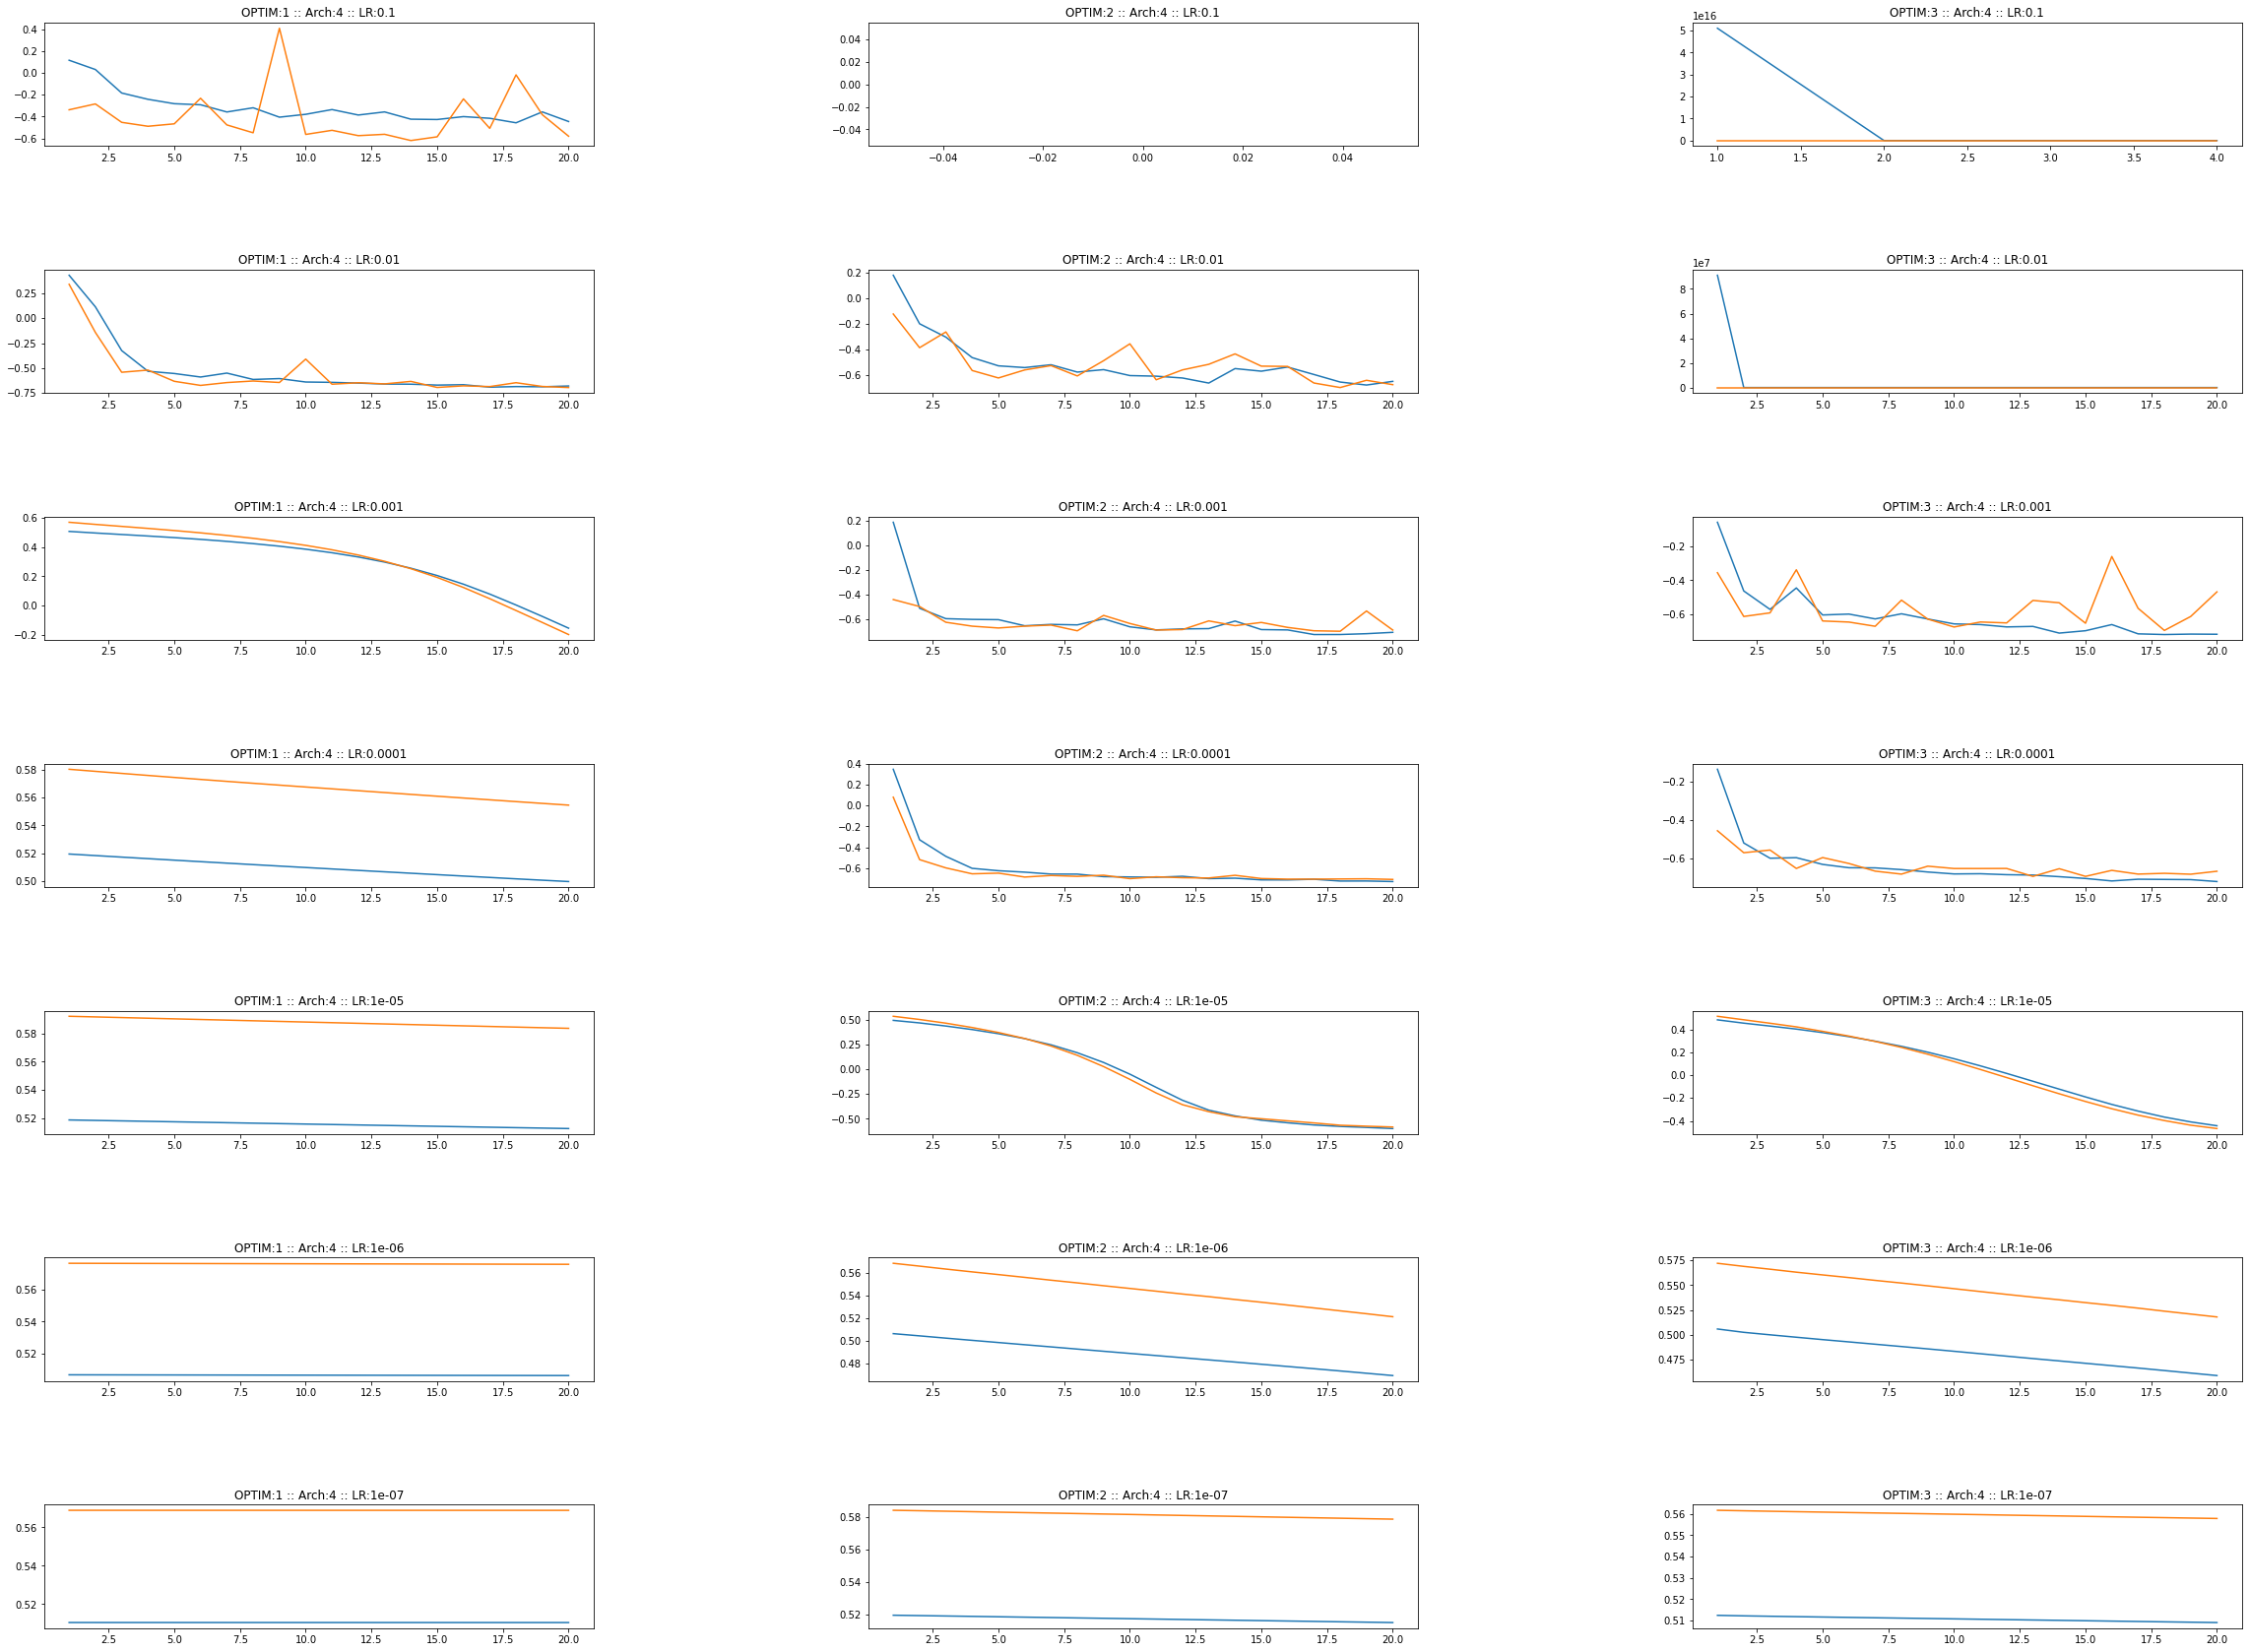

In [ ]:
fig, axs = plt.subplots(len(LRs),len(Optimizers), figsize=(40, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.5)
i, j = 0, 0

for O in Optimizers:
  j = 0
  for LR in LRs:

    model = Model(arch = ARCH, end_node = NODE)
    criterion = LOSS

    if O == 1:
      optimizer = torch.optim.SGD(model.parameters(), lr=LR)
    if O == 2:
      optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    if O == 3:
      optimizer = torch.optim.RMSprop(model.parameters(), lr=LR)

    print(f"Now Running - ARCH: {ARCH}; LR: {LR}; Optimizer: {O}")
    train_error, val_error = train_new(num_epochs, batch_size, criterion, optimizer, model, train_set, val_set)

    axs[j,i].plot(range(1, num_epochs+1), train_error, label = 'Train Loss')
    axs[j,i].plot(range(1, num_epochs+1), val_error, label = 'Val Loss')
    axs[j,i].set_title(f'OPTIM:{O} :: Arch:{ARCH} :: LR:{LR}')

    j += 1
  i += 1


fig.savefig(dir + f'Visualization of Optim Change -- ARCH: {ARCH} Q2.png')

### Exercice 4: Prediction on test set
* Once you have a model that seems satisfying on the validation dataset, you SHOULD evaluate it on a test dataset that has never been used before, to obtain a final accuracy value.
* When using the Gaussian likelihood function, the confidence of the network in its prediction is reflected in the variance it outputs. It can be interesting to check how this uncertainty varies with the data. For example, the uncertainty will decrease when the feature `OverallQual` increases. Plot the variance $\sigma(x)$ w.r.t one of the three features, on test set, and describe what you observe.

In [ ]:
#BEST PERFORMING MODEL
ARCH = 4
NODE = 2

# Define hyper-parameters:
model = Model(arch=ARCH, end_node = NODE)

# Choose the hyperparameters for training: 
num_epochs = 6
batch_size = 10
LR = 10**-4

# Training criterion. This one is a mean squared error (MSE) loss between the output
# of the network and the target label
criterion = LOSS

# Use SGD optimizer with a learning rate of 0.01
# It is initialized on our model
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [ ]:
train_error, val_error = train_new(num_epochs, batch_size, criterion, optimizer, model, train_set, val_set)

Epoch [1/6], Train Loss: 0.3802, Val Loss: 0.1541,
Epoch [2/6], Train Loss: -0.1989, Val Loss: -0.2969,
Epoch [3/6], Train Loss: -0.4561, Val Loss: -0.5710,
Epoch [4/6], Train Loss: -0.5961, Val Loss: -0.5703,
Epoch [5/6], Train Loss: -0.6001, Val Loss: -0.5655,
Epoch [6/6], Train Loss: -0.6096, Val Loss: -0.6345,


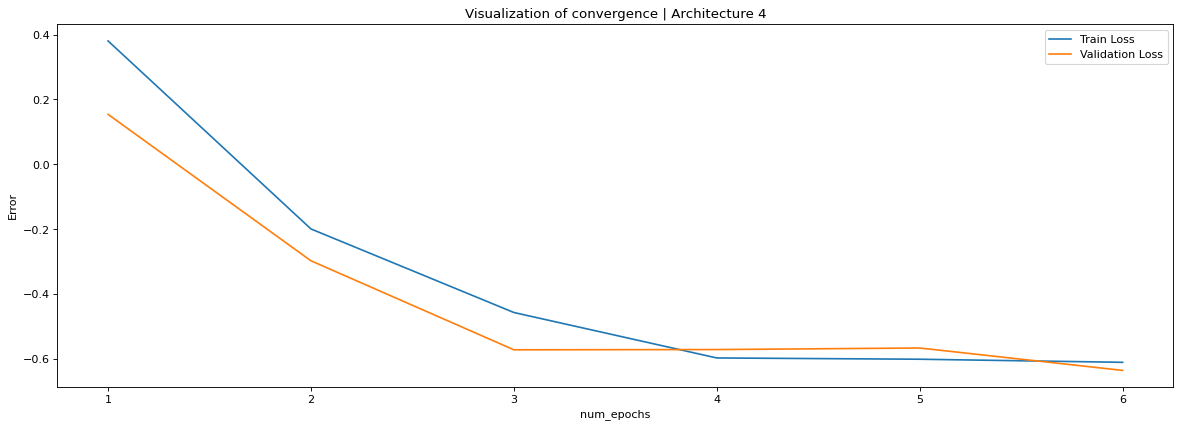

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(18, 6), dpi=80)
plt.plot(range(1, num_epochs+1), train_error, label = 'Train Loss')
plt.plot(range(1, num_epochs+1), val_error, label = 'Validation Loss')
plt.xlabel("num_epochs")
plt.ylabel("Error")
plt.title(f"Visualization of convergence | Architecture {ARCH}")
plt.legend()
plt.savefig(dir + f'Visualization of convergence - FINAL ON TEST| Architecture {ARCH}.png')
plt.show()

In [ ]:
# Calculate mean squared error on validation set
model.eval()
with torch.no_grad():
    y_pre_val, var = torch.split(model(torch.from_numpy(np.array(X_test)).float()).t(), 1, dim =0)
    var = torch.exp(var)
error = criterion(y_pre_val, torch.tensor(np.array(y_test)).float(), var).item()
print('The loss on Test set is:', error)

The loss on Test set is: -0.5955187082290649


In [ ]:
var = var[0].detach().numpy()
pred = y_pre_val[0].detach().numpy()

In [ ]:
pred = pred * std['SalePrice'] + mean['SalePrice']
y_test = y_test * std['SalePrice'] + mean['SalePrice']

In [ ]:
X_test_new = (X_test * std) + mean

In [ ]:
X_test_new['VAR'] = var
X_test_new['Pred'] = pred
X_test_new['SalePrice'] = y_test

In [ ]:
X_test_new.head()

,GrLivArea,OverallQual,SalePrice,TotalBsmtSF,YearBuilt,VAR,Pred
1200,864.0,4.0,116050.0,864.0,1970.0,0.040726,107553.023438
1201,1779.0,7.0,197900.0,866.0,1998.0,0.107540,204506.000000
1202,1348.0,5.0,117000.0,884.0,1925.0,0.124141,120666.351562
1203,1630.0,7.0,213000.0,1630.0,2000.0,0.180519,232852.671875
1204,1074.0,5.0,153500.0,1056.0,1975.0,0.081401,133635.046875


In [ ]:
X_test_new['Diff'] = X_test_new['Pred']-X_test_new['SalePrice']

In [ ]:
X_test_new[X_test_new['VAR'] > 1] = 1

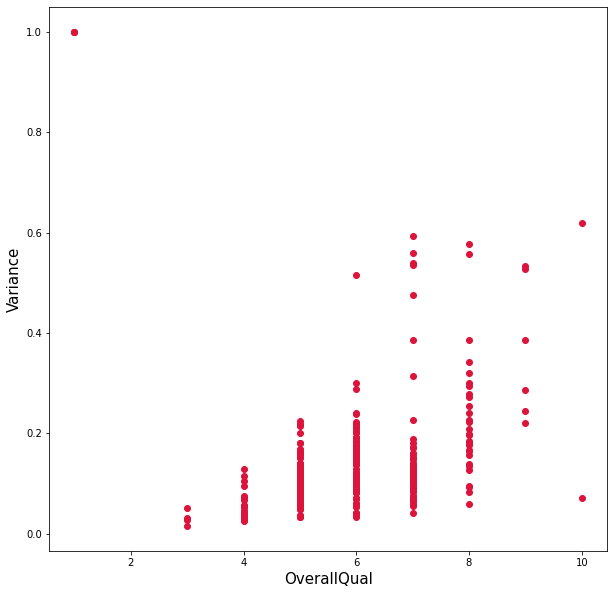

<Figure size 432x288 with 0 Axes>

In [ ]:
# Qual vs variance
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(X_test_new['OverallQual'], X_test_new['VAR'], c='crimson')
plt.plot()
plt.xlabel('OverallQual', fontsize=15)
plt.ylabel('Variance', fontsize=15)
plt.show()
plt.savefig(dir + f'Quality vs Variance - FINAL.png')#


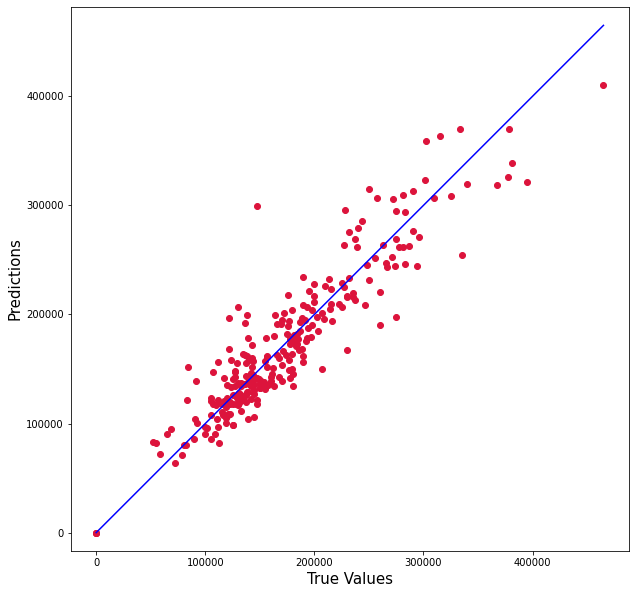

<Figure size 432x288 with 0 Axes>

In [ ]:
# Actual vs Pred
plt.figure(figsize=(10,10))
plt.scatter(X_test_new['SalePrice'], X_test_new['Pred'], c='crimson')
p1 = max(max(X_test_new['Pred']), max(X_test_new['SalePrice']))
p2 = 0
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()
plt.savefig(dir + f'Actual vs Predicted - FINAL.png')#